임시 빈칸

@

@

@

# 부동산 가격변화 알아보기

- I. 출산율에 따른 부동산 가격 변화
- II. 역대 대통령 임기별 부동산 가격 변화
- III. 인구이동에 따른 부동산 가격 변화
- IV. 연도별 부동산 가격 변화

## 용어정리

주택매매 가격지수 : 아파트, 연립주택, 단독주택 등 주택시장의 평균적인 매매가격변화를 측정하는 지표.

주택전세 가격지수 : 아파트, 연립주택, 단독주택 등 주택시장의 평균적인 전세가격변화를 측정하는 지표.

지가 지수 : 감정 평가사가 평가한 표본지의 적정가격을 지수화한 것.

지가 변동률 : 기준시점 대비 해당시점의 지가지수의 상승분을 나타낸 것.

아파트 실거래 가격지수 : 전국의 재고 아파트 실제 거래가 및 가격변동률을 지수화 한 것.
			(기준년도 아파트의 가격을 100으로 봤을 때, 현재 가격의 오르내림 정도를 반영 지수로 표기)

주택월세통합가격지수 : 기준시점 대비 해당시점의 지가지수의 상승분을 나타낸 것.
			(인터넷에는 같은 명칭

# 아이디어 접근 
- MZ세대가 집을 구하기 어려운 이유 
- 코로나, 금리, 정책변동, 1인가구수의 증가, 급여변동x 
- 서울과 부산지역의 부동산 가격 변화 시각화해보자 ! 
- 역세권에 따른 집값변동 조사
- 고용률과 주택수요의 관련성

# 아이디어 접근 
- MZ세대가 집을 구하기 어려운 이유 
- 코로나, 금리, 정책변동, 1인가구수의 증가, 급여변동x 
- 서울과 부산지역의 부동산 가격 변화 시각화해보자 ! 
- 역세권에 따른 집값변동 조사
- 고용률과 주택수요의 관련성

In [ ]:
from google.colab import drive
drive.mount('./mount')

Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os, re
import warnings
import matplotlib
import matplotlib.dates as mdates
import folium,json
from folium import plugins
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
import matplotlib.dates as mdates

In [1]:
print(os)

NameError: name 'os' is not defined

In [3]:
path = 'Desktop/policy_analysis/'

# **I. 출산율과 혼인율 변화**

주거 공간은 가족 구성에도 큰 영향을 미친다.

좁은 집에서 대식구가 살기는 어렵다.

가족의 구성원이 늘어나기 위해선 그에 상응하는 충분한 주거공간이 필요하다.

가족 구성원이 변화하는 것은 출산과 결혼을 통해 나타난다.

출산율과 혼인율에는 취업율 등의 어려요소가 영향을 미치겠지만,

이러한 요소들은 공통적으로 미래에 대한 기대, '미래에 내가 가정을 꾸리고 살아갈 수 있다'는 생각과 환경에 영향을 미치는 요소들이라고 생각한다.

가정을 꾸리기 위해선 가족이 살아갈 주거공간 마련이 필수이기에, 특히 집값은 여러 영향요인 중 큰 비중을 차지할 것으로 보인다.

따라서 출산율과 혼인률의 변화를 살펴본뒤,

집값변화와의 관계를 살펴보자

# 1. 출산율

## 1) 출산율

- 합계 출산율 (TFR, Total Fertility Rate) : 여성 1명이 평생동안 낳을 것으로 예상되는 평균 출생아 수를 나타낸 지표로서 연령별 출산율(ASFR)의 총합이며, 출산력 수준을 나타내는 대표적 지표임

출처: KOSIS 국가통계포털 - 인구동향조사 - 출생 - 출생아수, 합계출산율, 자연증가 등 (1970~2020)

In [ ]:
birth = pd.read_csv(path+'출산율/'+'출생아수_합계출산율_자연증가_등.csv', encoding = 'cp949',index_col =[0])

In [ ]:
birth = birth.T
birth = birth.drop(['항목','단위','Unnamed: 54'], axis=0)
birth = birth.astype('float64')
birth=birth.rename(index=lambda x:x[0:4])

In [ ]:
birth.head(3)

기본항목별    출생아수(명)  자연증가건수(명)  조출생률(천명당)  자연증가율(천명당)  합계출산율(명)  출생성비(명)
1970   1006645.0   748056.0       31.2        23.2      4.53    109.5
1971   1024773.0   787245.0       31.2        23.9      4.54    109.0
1972    952780.0   742709.0       28.4        22.2      4.12    109.5

출생아 수 (2000년 이후)

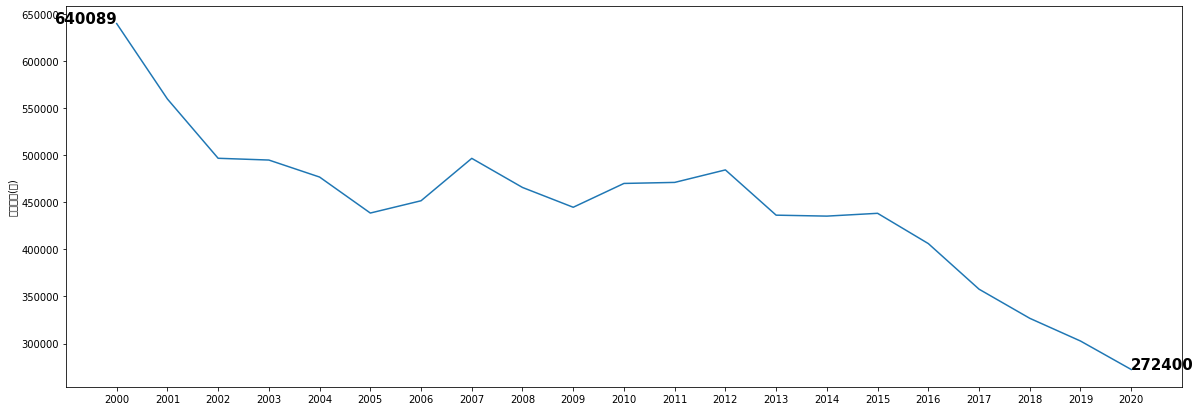

In [ ]:
fig = plt.figure(figsize = (20, 7))
g = sns.lineplot(data = birth.loc['2000':, '출생아수(명)'])
g.text(birth.index[-21], birth.iloc[-21,0], int(birth.iloc[-21,0]), fontsize = 15, weight = 'bold', ha = 'right' )
g.text(birth.index[-1], birth.iloc[-1,0], int(birth.iloc[-1,0]), fontsize = 15, weight = 'bold', ma = 'right' )
plt.show()

합계출산율 (2000년 이후)

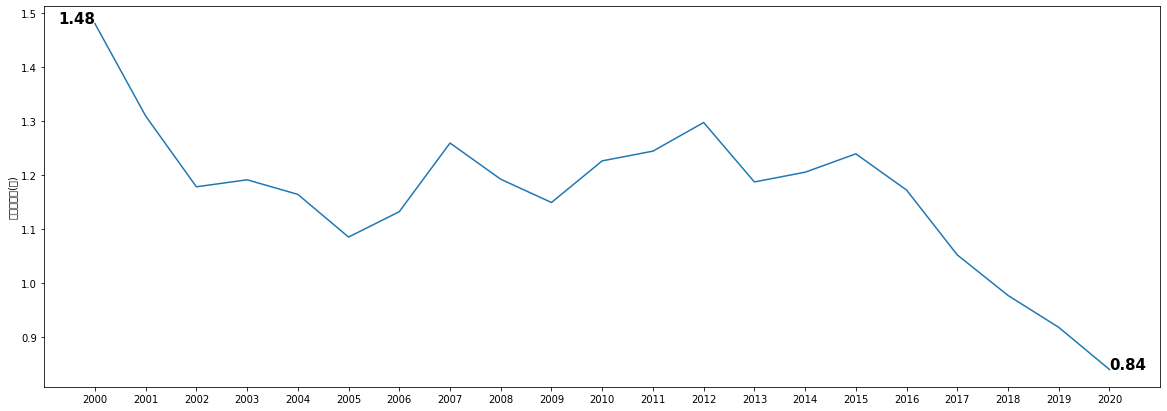

In [ ]:
fig = plt.figure(figsize = (20, 7))
g=sns.lineplot(data = birth.loc['2000':, '합계출산율(명)'])
g.text(birth.index[-21], birth.iloc[-21,4], birth.iloc[-21,4], fontsize = 15, weight = 'bold', ha = 'right' )
g.text(birth.index[-1], birth.iloc[-1,4], birth.iloc[-1,4], fontsize = 15, weight = 'bold', ma = 'right' )
plt.show()

# 2) 시도별 출산율
합계출산율:

- 단위: 가임여성 1명당 명

모의 연령별출산율:

- 단위: 해당연령 여자인구 1천명당 명

- 구간: 15-19세/20-24세/25-29세/30-34세/35-39세/40-44세/45-49세


출처: KOSIS 국가통계포털 - 인구동향조사 - 출생 -시도/합계출산율, 모의 연령별 출산율 (1993~2019)

In [ ]:
sido_birth = pd.read_csv(path+'출산율/'+'시도_합계출산율_모의_연령별_출산율.csv',  encoding = 'cp949',index_col =[0,1],header =[0])
sido_birth.index.names = ['','']
sido_birth=sido_birth.drop(['단위','Unnamed: 30'],axis=1)

sido_birth = sido_birth.T
sido_birth = sido_birth.rename(index=lambda x:x[0:4])
sido_birth = sido_birth.stack()
sido_birth = sido_birth.astype('float64')

sido_birth = sido_birth[['전국','서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별자치시',
                         '경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도']]

#sido_birth.index[0]['20-24세']
#print(sido_birth.index[0][1])


#sido_birth = sido_birth.astype('float64')
#sido_birth.index[1][0]

#sido_birth.index.names = ['','']
#sido_birth.replace('-',np.NaN,inplace = True)

#print(sido_birth.index.names)

#sido_birth = sido_birth.reindex(index=['모의 연령별출산율:15-19세','합계출산율','20-24세','25-29세','30-34세','35-39세','40-44세','45-49세'])

#sido_birth.loc['1993'].reindex(index=['합계출산율','모의 연령별출산율:15-19세','20-24세','25-29세','30-34세','35-39세','40-44세','45-49세'])
#sido_birth.head(10)
#print(sido_birth.index[0])

#print(sido_birth.index[7])
#sido_birth.xs('합계출산율',level=1)
sido_birth.head(10)

전국    서울특별시    부산광역시  ...     경상북도    경상남도  제주특별자치도
                                                  ...                          
1993 20-24세             71.900   54.200   58.600  ...   71.700   86.80   66.000
     25-29세            176.500  168.400  167.300  ...  177.700  193.60  182.400
     30-34세             63.200   70.000   58.200  ...   54.600   58.40   89.000
     35-39세             13.500   14.000   11.900  ...   12.500   12.50   22.200
     40-44세              2.000    1.800    1.700  ...    1.700    2.00    4.700
     45-49세              0.200    0.200    0.100  ...    0.200    0.10    0.300
     모의 연령별출산율:15-19세    4.400    2.700    2.900  ...    4.000    4.10    4.600
     합계출산율               1.654    1.558    1.505  ...    1.613    1.79    1.847
1994 20-24세             65.400   48.300   52.400  ...   66.900   77.90   63.400
     25-29세            177.500  169.000  164.100  ...  177.300  194.90  185.100

[10 rows x 18 columns]

시간이 지남에 따라 연령대 출산율이 어떻게 변화하는지 살펴보자.(전국 출산율)

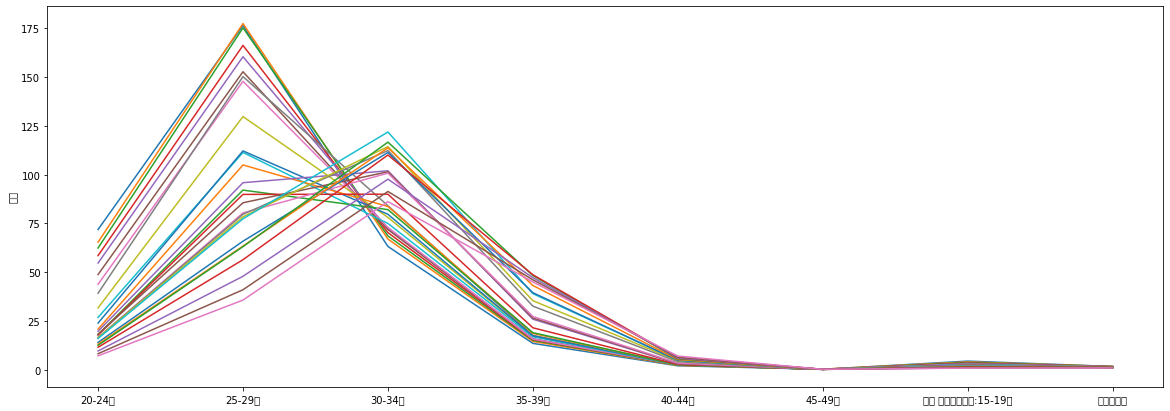

In [ ]:
fig = plt.figure(figsize = (20, 7))
for i in range(1993,2020):
    sns.lineplot(data = sido_birth.loc[str(i)]['전국'])

plt.show()

'25-29세'일 때가 고점인 시기와, '30-34세'일 때가 고짐인 시기로 나누어진 것을 볼 수 있다.

5년 간격으로 살펴보면 2000년대 후반부터 '30-34세'일 때의 출산율이 가장 높아졌다.

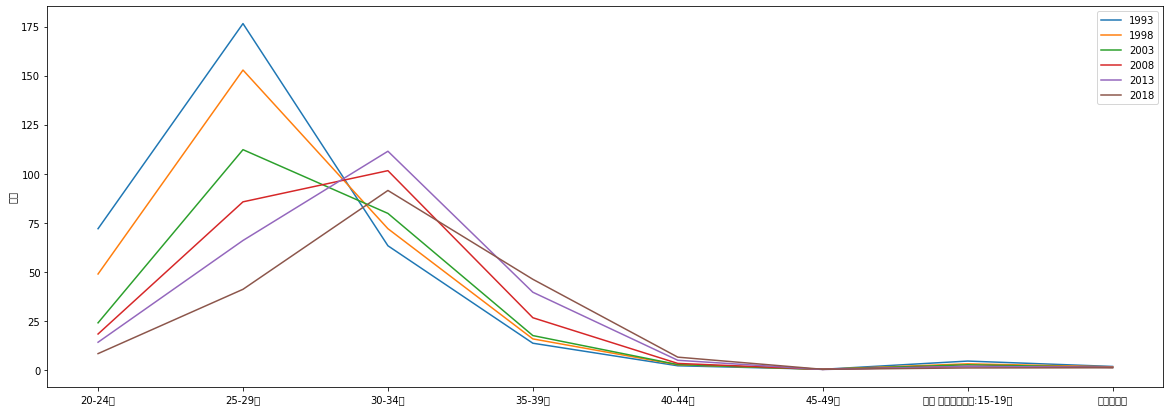

In [ ]:
fig = plt.figure(figsize = (20, 7))
for i in range(1993,2020,5):
    sns.lineplot(data = sido_birth.loc[str(i)]['전국'], label = str(i))
plt.show()

In [ ]:
birth_sum = sido_birth.xs('합계출산율',level = 1,  axis= 0)

연도별 합계출산율을 보았을 때,부산이 최하위를 기록하다 2010년 이후 부터는 서울이 부산을 제치고 최하위 지역이 되었다.

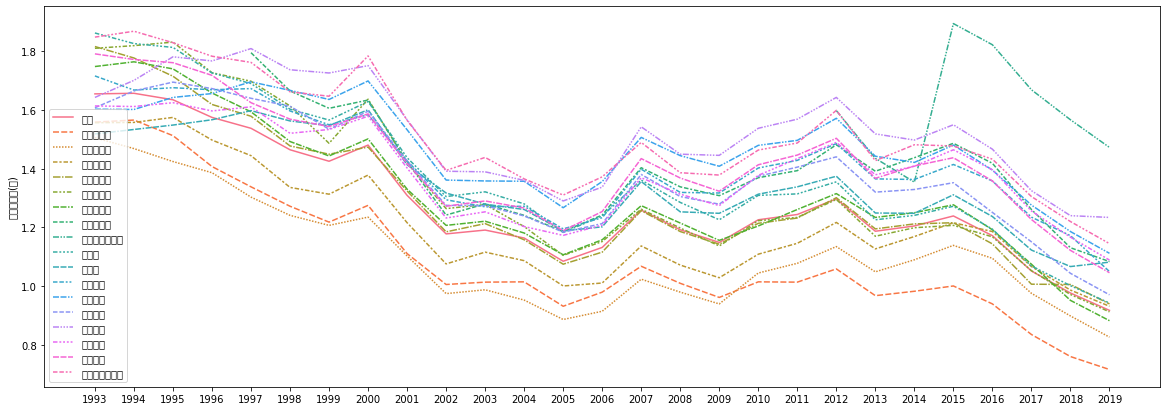

In [ ]:
fig = plt.figure(figsize = (20, 7))
g =sns.lineplot(data = birth_sum)

g.set(ylabel = '합계출산율(명)')
plt.show()

이후 부터는 전국과 부산 데이터만 사용해서 알아보았다.

In [ ]:
#연령대 별 데이터 생성
birth_sum = sido_birth.xs('합계출산율',level = 1,  axis= 0)[['전국','부산광역시']]
birth_20 = sido_birth.xs('20-24세',level = 1,  axis= 0)[['전국','부산광역시']]
birth_25 = sido_birth.xs('25-29세',level = 1,  axis= 0)[['전국','부산광역시']]
birth_30 = sido_birth.xs('30-34세',level = 1,  axis= 0)[['전국','부산광역시']]
birth_35 = sido_birth.xs('35-39세',level = 1,  axis= 0)[['전국','부산광역시']]

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


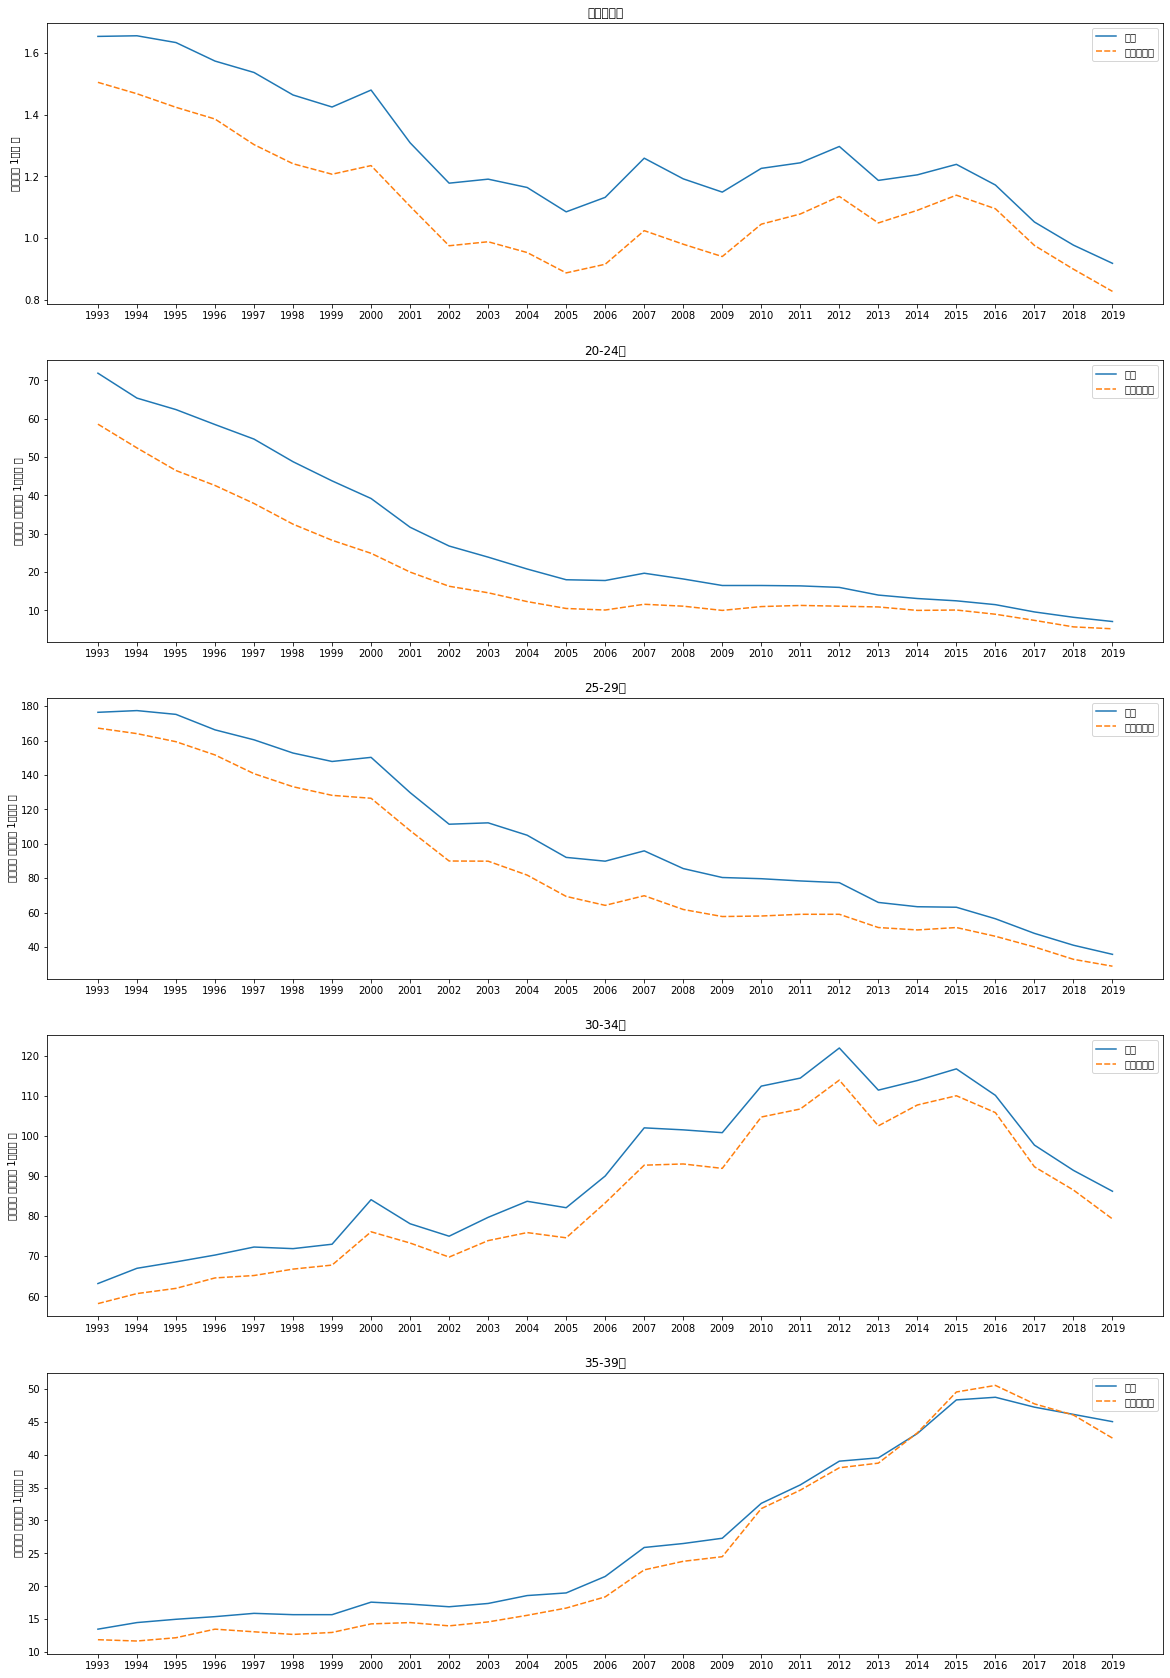

In [ ]:
figure, ((ax1,ax2,ax3,ax4,ax5)) = plt.subplots(nrows=5, ncols=1)
figure.set_size_inches(20,30)

sns.lineplot(data = birth_sum, ax = ax1)
sns.lineplot(data = birth_20, ax = ax2)
sns.lineplot(data = birth_25, ax = ax3)
sns.lineplot(data = birth_30, ax = ax4)
sns.lineplot(data = birth_35, ax = ax5)

ax1.set(ylabel = '가임여성 1명당 명',title="합계출산율")
ax2.set(ylabel = '해당연령 여자인구 1천명당 명',title="20-24세")
ax3.set(ylabel = '해당연령 여자인구 1천명당 명', title="25-29세")
ax4.set(ylabel = '해당연령 여자인구 1천명당 명', title="30-34세")
ax5.set(ylabel = '해당연령 여자인구 1천명당 명', title="35-39세")

plt.show()

## 전체적인 출산율 (합계출산율)은 감소하고 있으며,
## 출산연령의 경우 20대의 출산 수는 감소하고 있고, 30대의 출산 수는 증가하고 있다.
출산연령이 높아지고 있다는 것은 다음 데이터를 통해서도 살펴볼 수 있다.


## 평균 출산연령
출처: KOSIS 국가통계포털 - 인구동향조사 - 출생 -시군구/ 모의 평균 출산연령, 모의 연령별(5세간격) 출생 (2000~2019)

In [ ]:
#birth_avg = pd.read_csv(path+'출산율/'+'시군구_모의_평균_출산연령_모의_연령별_5세간격_출생.csv',  encoding = 'cp949',index_col =[0],header =[0],skiprows=[1] )

In [ ]:
birth_avg = pd.read_csv(path+'출산율/'+'시군구_모의_평균_출산연령_모의_연령별_5세간격_출생.csv',  encoding = 'cp949',index_col =[0],header =[0] )
birth_avg = birth_avg.T
birth_avg = birth_avg.drop(['항목','단위','Unnamed: 23'],axis=0)
birth_avg = birth_avg.rename(index=lambda x:x[0:4])
birth_avg = birth_avg.astype('float64')
birth_avg.columns.names =['']

birth_avg = birth_avg.loc[:,~birth_avg.columns.duplicated()]

sido = ['전국','서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별자치시',
        '경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도']

dupl = [False]*birth_avg.columns.size

for i in range(0, birth_avg.columns.size):
  for j in sido:
    if birth_avg.columns[i] == j:
      dupl[i]=True

birth_avg = birth_avg.loc[:,dupl]

birth_avg.tail(3)

전국  서울특별시  부산광역시  대구광역시  인천광역시  ...   전라북도   전라남도   경상북도   경상남도  제주특별자치도
2017  32.60  33.33  32.85  32.64  32.47  ...  32.01  31.92  32.10  32.34    32.57
2018  32.80  33.55  33.11  32.83  32.66  ...  32.28  32.16  32.29  32.45    32.76
2019  33.01  33.81  33.23  32.94  32.90  ...  32.37  32.41  32.47  32.70    32.95

[3 rows x 18 columns]

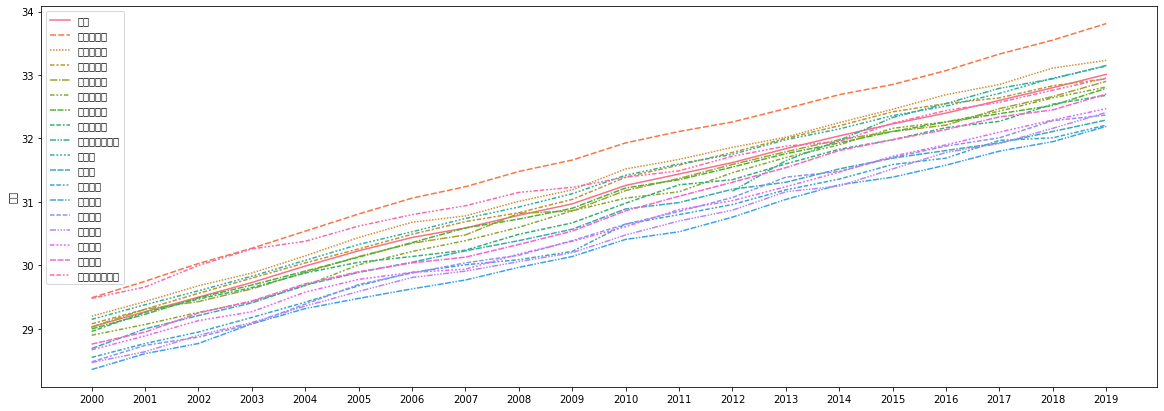

In [ ]:
fig = plt.figure(figsize = (20, 7))
g = sns.lineplot(data = birth_avg)

g.set(ylabel = '연령')
plt.show()

전국, 부산 데이터만 추출

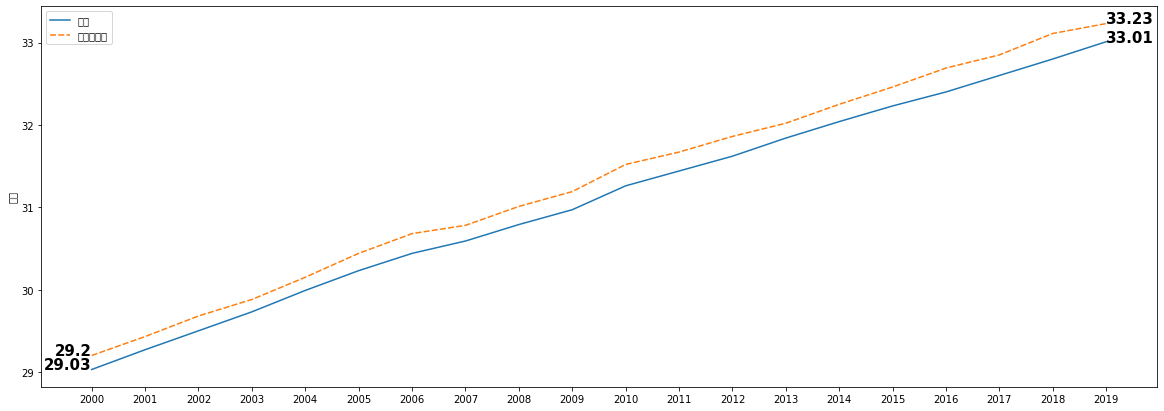

In [ ]:
fig = plt.figure(figsize = (20, 7))
g = sns.lineplot(data = birth_avg[['전국','부산광역시']]) # ['서울']

g.text(birth_avg.index[0], birth_avg.loc['2000','전국'], birth_avg.loc['2000','전국'],fontsize = 15, weight = 'bold', ha = 'right')
#g.text(birth_avg.index[0], birth_avg.loc['2000','서울특별시'], birth_avg.loc['2000','서울특별시'],fontsize = 15, weight = 'bold', ha = 'right') 
g.text(birth_avg.index[0], birth_avg.loc['2000','부산광역시'], birth_avg.loc['2000','부산광역시'],fontsize = 15, weight = 'bold', ha = 'right') 
g.text(birth_avg.index[-1], birth_avg.loc['2019','전국'], birth_avg.loc['2019','전국'],fontsize = 15, weight = 'bold', ma = 'right')
#g.text(birth_avg.index[-1], birth_avg.loc['2019','서울특별시'], birth_avg.loc['2019','서울특별시'],fontsize = 15, weight = 'bold', ma = 'right') 
g.text(birth_avg.index[-1], birth_avg.loc['2019','부산광역시'], birth_avg.loc['2019','부산광역시'],fontsize = 15, weight = 'bold', ma = 'right')

g.set(ylabel = '연령')
plt.show()

전국적으로 산모의 평균출산연령이 증가하고 있으며, 서울은 전국평균보다 더 높다.


## 2. 혼인율

1) 시도별 혼인율

단위: 천명당 혼인건수 (연령별의 경우 해당연령 천명당 건)
출처:

KOSIS 국가통계포털 - 인구동향조사 - 혼인 - 연령별 혼인율, 혼인건수 -시도/일반혼인율 (1990~2020)

KOSIS 국가통계포털 - 인구동향조사 - 혼인 - 연령별 혼인율, 혼인건수 -시도/성/연령별 혼인율 (1990~2020)

In [ ]:
#marriage = pd.read_csv(path+'시도_일반혼인율.csv',  encoding = 'cp949',index_col =[0],header =[0,1] )
#marriage_age = pd.read_csv(path+'시도_성_연령별_혼인율.csv',  encoding = 'cp949',index_col =[0,1],header =[0,1])

In [ ]:
marriage = pd.read_csv(path+'출산율/'+'시도_일반혼인율.csv',  encoding = 'cp949',index_col =[0,1],header =[0] )

marriage = marriage.T
#marriage = marriage.drop(['단위'],axis=0)
marriage = marriage.rename(index=lambda x:x[0:4])
marriage.columns.names= ['','']
marriage.replace('-',np.NaN, inplace = True)


#for i in marriage.columns:

#marriage = marriage.loc[:,~marriage.columns.duplicated()]

#marriage.replace('-',np.NaN, inplace = True)
#marriage = marriage.astype('float64')

#print(marriage.columns[0][1])

#t = marriage[['전국']] #,'서울특별시','부산광역시']].T
#t = marriage.index[[0]]

marriage = marriage.stack()
marriage = marriage[['전국','서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별자치시',
        '경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도']]

marriage.head(4)
#marriage.xs('남편',level=1, axis=0).head(3)
#marriage.xs('남편',level = 1,  axis= 0)[['전국','부산광역시']]

전국 서울특별시 부산광역시 대구광역시 인천광역시  ...  전라북도  전라남도  경상북도  경상남도 제주특별자치도
                                       ...                                
1990 남편  25.2  26.5  23.4  21.8  26.4  ...  22.9  24.9  26.2  26.8    21.4
     아내  24.9  23.7  21.9  20.4  22.5  ...  27.4  30.5  29.4  26.3    22.3
1991 남편  25.8  27.5  23.4    22  27.4  ...  23.5    26  26.9  26.7    23.4
     아내  25.6  24.8  22.5  20.8  23.7  ...  28.1  31.2  30.3  26.2    24.6

[4 rows x 18 columns]

연도별 시도 혼인율

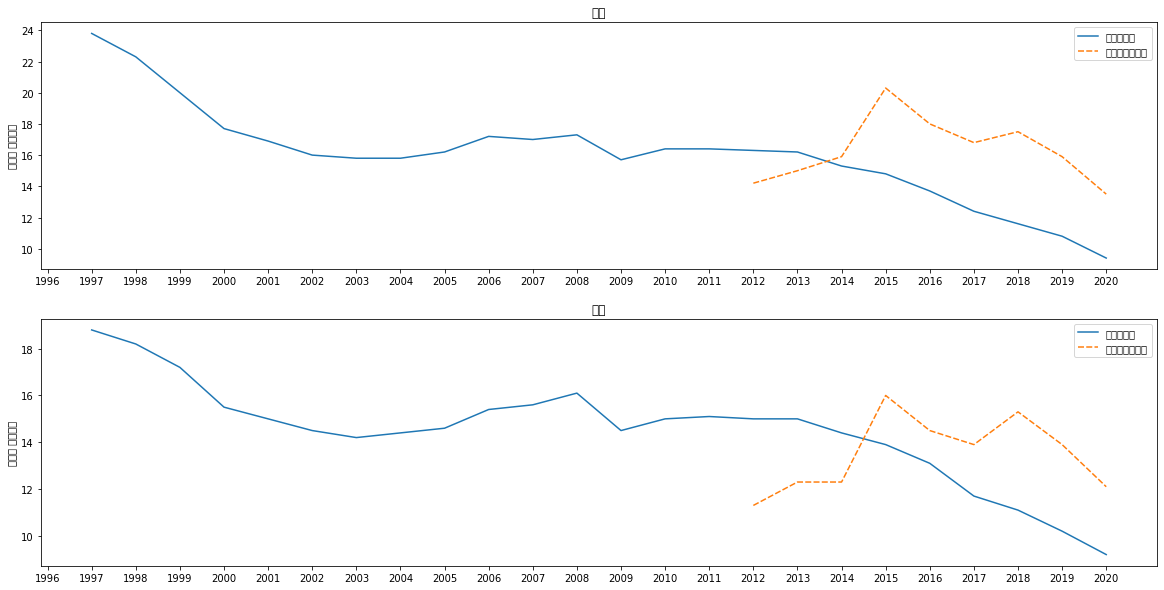

In [ ]:
figure, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(20,10)

sns.lineplot(data = marriage.xs('남편',level = 1,  axis= 0), ax = ax1)
sns.lineplot(data = marriage.xs('아내',level = 1,  axis= 0), ax = ax2)

ax1.set(ylabel = '천명당 혼인건수',title="남편")
ax2.set(ylabel = '천명당 혼인건수',title="아내")

plt.show()

TypeError: ignored

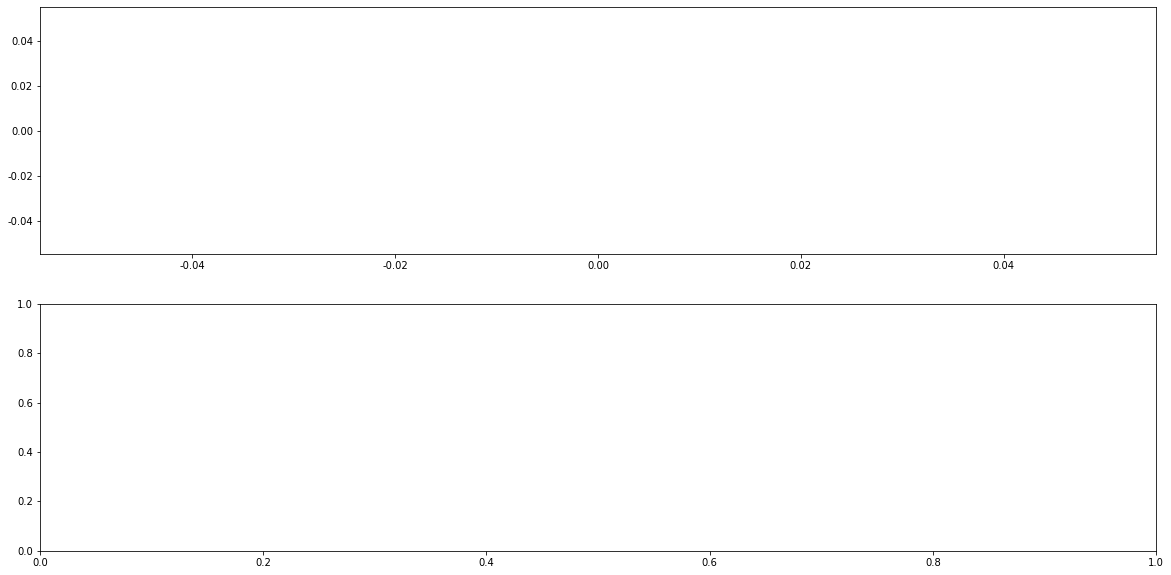

In [ ]:
figure, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(20,10)

sns.lineplot(data = marriage.xs('남편',level = 1,  axis= 0)[['전국','부산광역시']], ax = ax1)
sns.lineplot(data = marriage.xs('아내',level = 1,  axis= 0)[['전국','부산광역시']], ax = ax2)

ax1.set(ylabel = '천명당 혼인건수',title="남편")
ax2.set(ylabel = '천명당 혼인건수',title="아내")

plt.show()

## 전국적으로 혼인율은 낮아지고 있으며, 서울 또한 같은 경향을 보여주고 있다.
다음으론 연령에 따른 혼인률을 살펴보자.

In [ ]:
marriage_age = pd.read_csv(path+'출산율/'+'시도_성_연령별_혼인율.csv',  encoding = 'cp949',index_col =[0,1,2],header =[0])

marriage_age = marriage_age.drop(['단위'],axis=1)

marriage_age = marriage_age.T
#marriage_age.columns.names = ['']
marriage_age = marriage_age.stack(level=2)
#marriage_age = marriage_age(index=lambda x:x[0:4])
marriage_age.replace('-',np.NaN, inplace = True)
marriage_age = marriage_age.astype('float64')
marriage_age = marriage_age[['계','서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별자치시',
                             '경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도']]

marriage_age.head(3)

시도별            계                             ...  제주특별자치도                        
연령별     15 - 19세 20 - 24세 25 - 29세 30 - 34세  ... 60 - 64세 65 - 69세 70 - 74세 75세이상
     항목                                      ...                                 
1990 남편      1.4     26.3    106.1     34.8  ...      1.8      2.1      1.5   1.8
     아내      8.4     92.1     70.9     11.7  ...      0.2      0.4      0.4   0.0
1991 남편      1.4     26.3    109.3     38.3  ...      1.3      3.0      0.9   1.1

[3 rows x 252 columns]

'25-29세', '남편' 데이터로 전체적인 흐름을 살펴보자

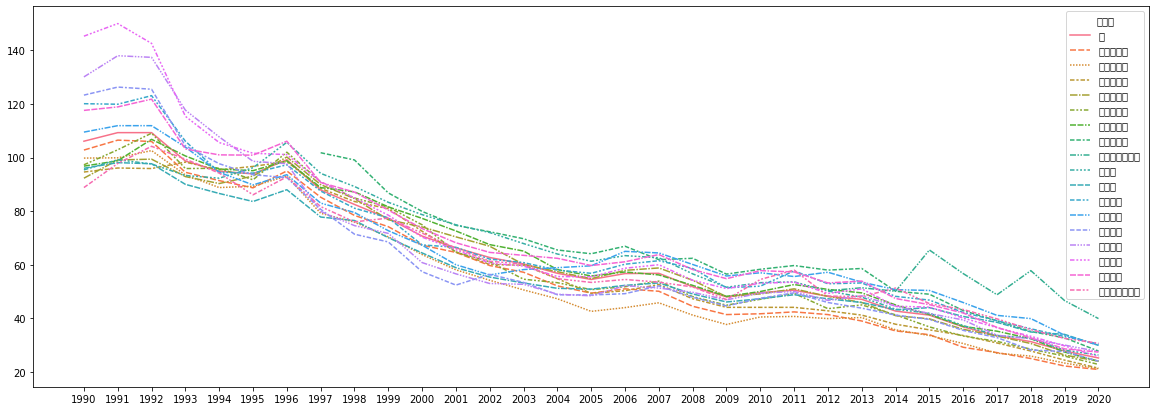

In [ ]:
fig = plt.figure(figsize = (20, 7))
sns.lineplot(data = marriage_age.xs('남편', level = 1, axis = 0).xs('25 - 29세', level = 1, axis =1))
plt.show()

In [ ]:
h_20 = marriage_age.xs('남편', level = 1, axis = 0).xs('20 - 24세', level = 1, axis =1)[['계','서울특별시']]
h_25 = marriage_age.xs('남편', level = 1, axis = 0).xs('25 - 29세', level = 1, axis =1)[['계','서울특별시']]
h_30 = marriage_age.xs('남편', level = 1, axis = 0).xs('30 - 34세', level = 1, axis =1)[['계','서울특별시']]
h_35 = marriage_age.xs('남편', level = 1, axis = 0).xs('35 - 39세', level = 1, axis =1)[['계','서울특별시']]

w_20 = marriage_age.xs('아내', level = 1, axis = 0).xs('20 - 24세', level = 1, axis =1)[['계','서울특별시']]
w_25 = marriage_age.xs('아내', level = 1, axis = 0).xs('25 - 29세', level = 1, axis =1)[['계','서울특별시']]
w_30 = marriage_age.xs('아내', level = 1, axis = 0).xs('30 - 34세', level = 1, axis =1)[['계','서울특별시']]
w_35 = marriage_age.xs('아내', level = 1, axis = 0).xs('35 - 39세', level = 1, axis =1)[['계','서울특별시']]

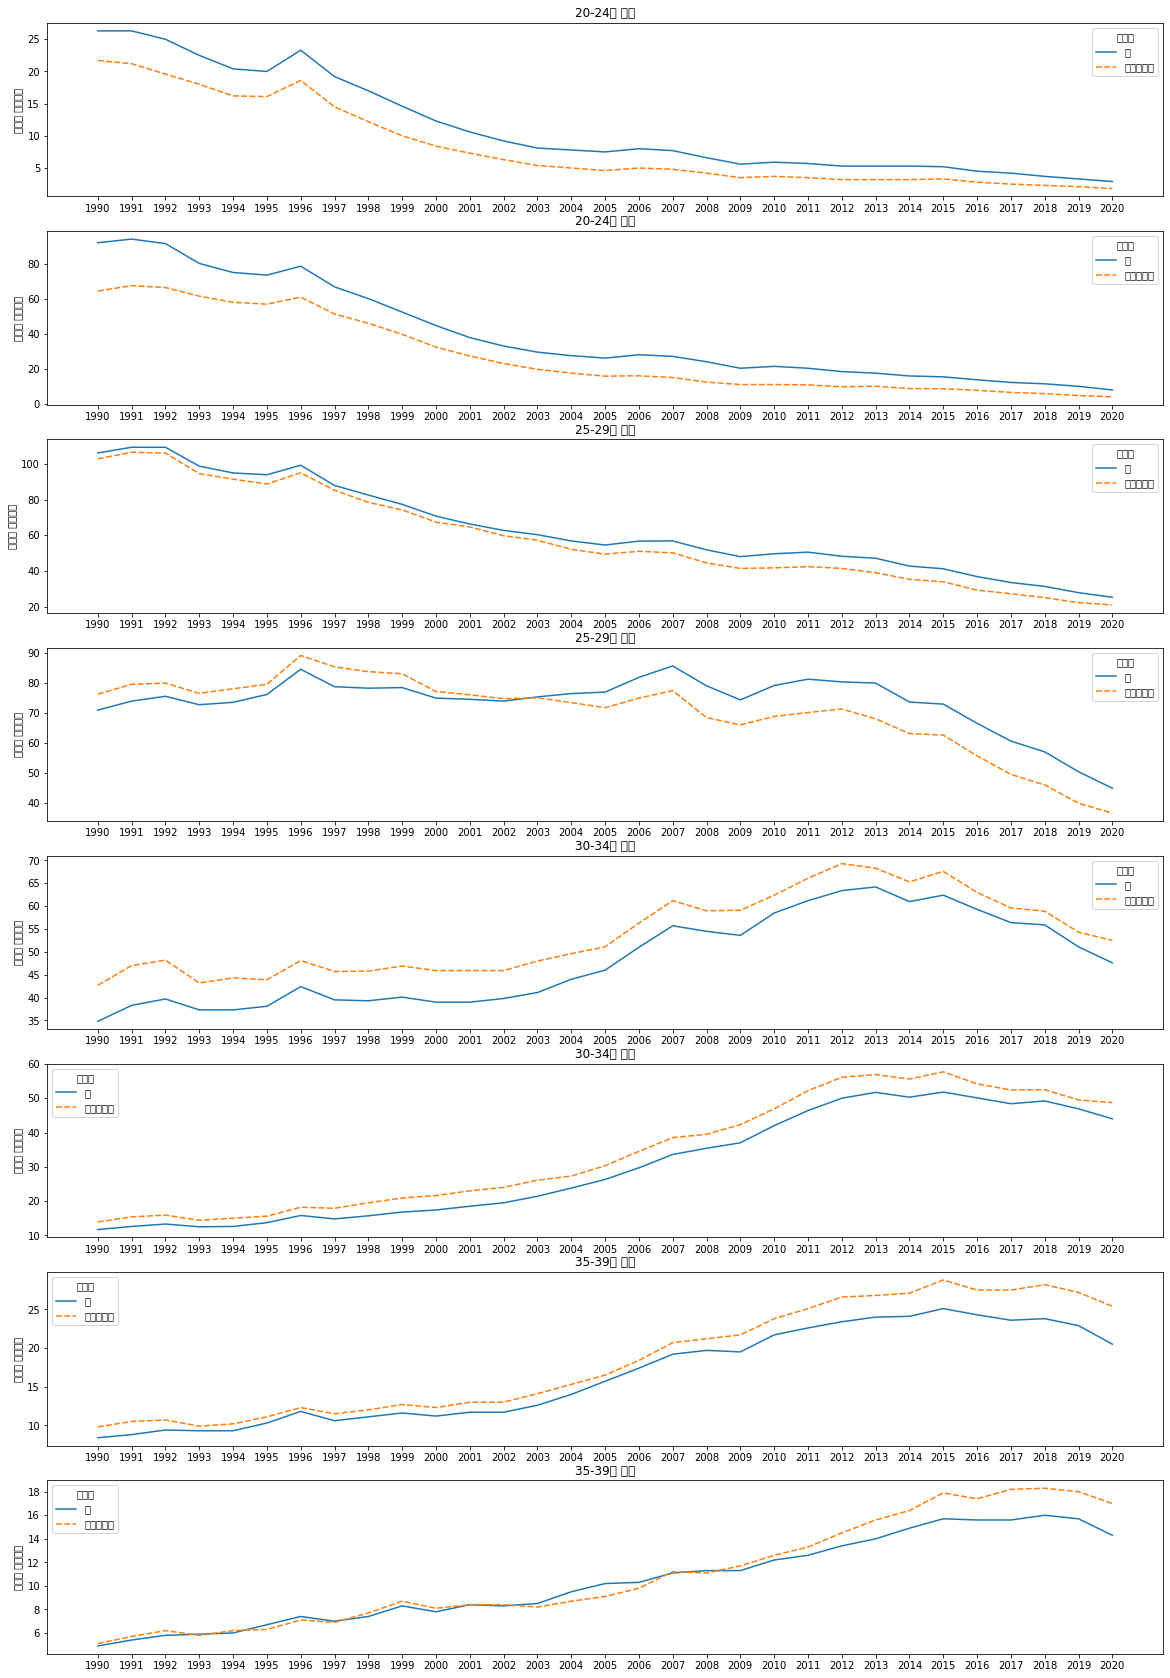

In [ ]:
figure, ((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8)) = plt.subplots(nrows=8, ncols=1)
figure.set_size_inches(20,30)

sns.lineplot(data = h_20, ax = ax1)
sns.lineplot(data = w_20, ax = ax2)

sns.lineplot(data = h_25, ax = ax3)
sns.lineplot(data = w_25, ax = ax4)

sns.lineplot(data = h_30, ax = ax5)
sns.lineplot(data = w_30, ax = ax6)

sns.lineplot(data = h_35, ax = ax7)
sns.lineplot(data = w_35, ax = ax8)


ax1.set(ylabel = '천명당 혼인건수', title="20-24세 남편")
ax2.set(ylabel = '천명당 혼인건수', title="20-24세 아내")
ax3.set(ylabel = '천명당 혼인건수', title="25-29세 남편")
ax4.set(ylabel = '천명당 혼인건수', title="25-29세 아내")
ax5.set(ylabel = '천명당 혼인건수', title="30-34세 남편")
ax6.set(ylabel = '천명당 혼인건수', title="30-34세 아내")
ax7.set(ylabel = '천명당 혼인건수', title="35-39세 남편")
ax8.set(ylabel = '천명당 혼인건수', title="35-39세 아내")

plt.show()

## 혼인시기가 점차 늦어지고 있다.
혼인 연령이 늦어지고 있다는 것은 다음 데이터를 통해서도 살펴볼 수 있다.

# 시도 평균초혼연령
출처: KOSIS 국가통계포털 - 인구동향조사 - 혼인 - 혼인종류(초혼, 재혼)별 혼인건수, 혼인연령 -시도별 평균초혼연령 (1990~2020)

In [ ]:
marriage_avg = pd.read_csv(path+'출산율/'+'시도별_평균초혼연령.csv',  encoding = 'cp949',index_col =[0,1],header =[0])

marriage_avg = marriage_avg.T
marriage_avg = marriage_avg.drop(['단위','Unnamed: 34'],axis=0)
marriage_avg.columns.names= ['',''] 
marriage_avg = marriage_avg.rename(index=lambda x:x[0:4])
marriage_avg.replace('-',np.NaN, inplace = True)

marriage_avg = marriage_avg.stack()
marriage_avg = marriage_avg[['전국','서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별자치시',
        '경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도','국외']]
marriage_avg = marriage_avg.astype('float64')

marriage_avg.head(4)

전국  서울특별시  부산광역시  대구광역시  인천광역시  ...   전라남도   경상북도   경상남도  제주특별자치도     국외
                                            ...                                     
1990 남편  27.79  28.26  27.96  27.66  27.80  ...  27.33  27.32  27.45    27.71  32.41
     아내  24.78  25.54  25.03  24.95  24.95  ...  24.07  24.26  24.27    25.07  27.66
1991 남편  27.91  28.38  28.07  27.78  27.90  ...  27.49  27.40  27.57    27.88  33.42
     아내  24.84  25.58  25.08  25.03  25.03  ...  24.14  24.29  24.37    25.12  27.32

[4 rows x 19 columns]

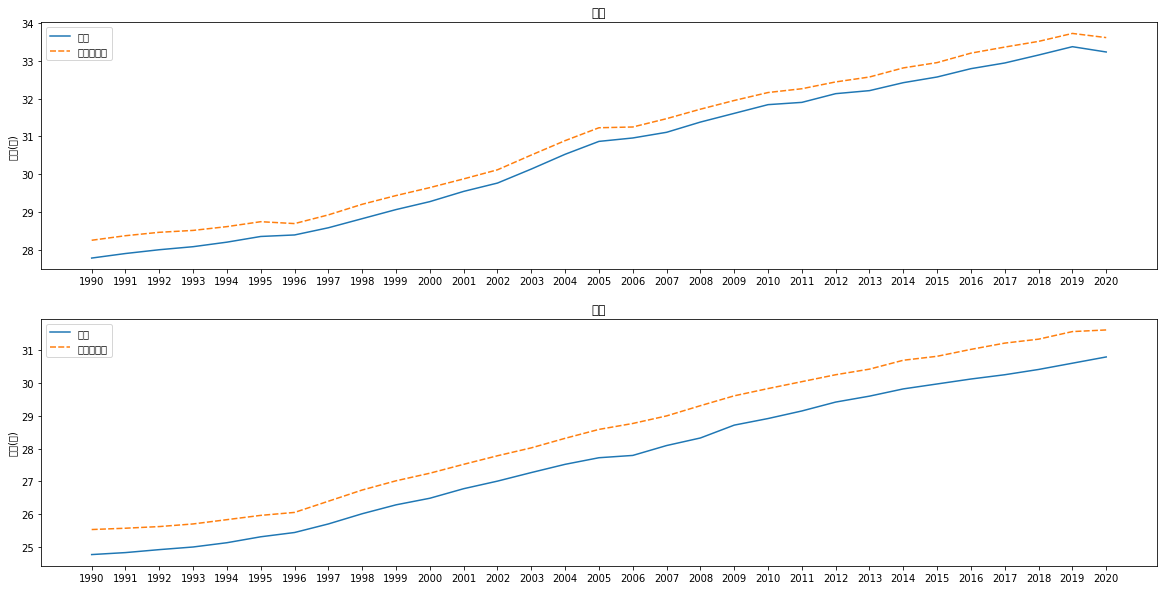

In [ ]:
figure, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(20,10)

sns.lineplot(data = marriage_avg.xs('남편', level =1, axis=0)[['전국','서울특별시']], ax = ax1)
sns.lineplot(data = marriage_avg.xs('아내', level =1, axis=0)[['전국','서울특별시']], ax = ax2)

ax1.set(ylabel = '연령(세)',title="남편")
ax2.set(ylabel = '연령(세)',title="아내")

plt.show()

전국적으로 남자와 여자 모두 평균 혼인 연령이 늦어지고 있으며, 서울은 전국평균보다 더 높다.

# **II. 역대 대통령 임기별 부동산 가격 변화**

대통령 정책과 관련한 부동산 가격 변화에 대해 알아보자. 먼저 각 대통령이 실시한 부동산 관련 정책에 대해서 정리를 해보았다,

이번 분석에는 노무현 대통령~문재인 대통령까지의 임기만을 확인해 분석해보았다. 더 이전의 대통령들은 너무 오래되었거나 현재 상황과는 많이 다를거라고 생각하기에 좀 더 정확한 분석결과를 가지기 위해서 노무현 대통령때부터 분석을 해보았다.

먼저 부동산 가격의 변화를 알아보기위해 매매가와 전세가의 변화에 대해서 분석을 해보았다.

#### 이번 분석에는 서울, 경기, 수도권 가격 위주로 분석을 실시하였다.

In [4]:
geo_data_sigungu = json.load(open(path+'TL_SCCO_SIG.json', encoding='utf-8'))
geo_data_sido = json.load(open(path+'TL_SCCO_CTPRVN.json', encoding='utf-8'))

#geo_data_sigungu = json.load(open('Desktop/부동산/TL_SCCO_SIG.json', encoding='utf-8'))
#geo_data_sido = json.load(open('Desktop/부동산/TL_SCCO_CTPRVN.json', encoding='utf-8'))

FileNotFoundError: [Errno 2] No such file or directory: 'Desktop/policy_analysis/TL_SCCO_SIG.json'

In [ ]:
# 제공된 csv 파일 불러오기
c_allow = pd.read_csv(path+'건축허가현황.csv')
total_c = pd.read_csv(path+'국내건설수주액.csv')
first_empty=pd.read_csv(path+'미분양주택현황.csv')
real_apt_cont = pd.read_csv(path+'아파트 실거래가격지수.csv')
cate_month_total = pd.read_csv(path+'유형별_주택월세통합가격지수.csv')
c_real_allow = pd.read_csv(path+'주택건설인허가실적.csv')
house_sell_level = pd.read_csv(path+'주택매매가격지수(KB).csv')
house_borrow_level = pd.read_csv(path+'주택전세가격지수(KB).csv')
region_value = pd.read_csv(path+'지역별_지가변동률.csv')

df_list=[c_allow, total_c, first_empty, real_apt_cont, cate_month_total, c_real_allow, house_sell_level, house_borrow_level, region_value]

In [ ]:
# 인덱스 부분 날짜로 수정
def date(df):
    df['Unnamed: 0']=pd.to_datetime(df['Unnamed: 0'], format='%Y-%m-%d')
    df.rename(columns={'Unnamed: 0':'날짜'}, inplace=True)
    df.set_index('날짜', inplace=True)
    return df

for i in df_list:
    date(i)

In [ ]:
# 각 csv 파일의 열목록 확인
df_list_name = ["c_allow", "total_c", "first_empty", "real_apt_cont", "cate_month_total", "c_real_allow", "house_sell_level", "house_borrow_level", "region_value"]

"""
for i in range(len(df_list)):
    print("="*50, df_list_name[i],"="*50)
    print(df_list[i].columns)
    print()
"""

'\nfor i in range(len(df_list)):\n    print("="*50, df_list_name[i],"="*50)\n    print(df_list[i].columns)\n    print()\n'

# 1. 임기별 매매가, 전세가 가격 변화
### 역대 대통령 정책 정리
정책에 대해서는 개인적으로 각 대통령별 부동산 관련 정책 목록을 찾아서 직접 엑셀 형식으로 작성하였다.

In [ ]:
policy_list = pd.read_excel(path+'정책/'+'노무현-문재인 정권 부동산 정책.xlsx', index_col=[0])
#policy_list = pd.read_excel(path_'부동산/노무현-문재인 정권 부동산 정책.xlsx', index_col=[0])

In [ ]:
#print(policy_list.index[0])
policy_list.head(10)

대통령  구분  방향                                정책
연도                                                       
2003-05-23  노무현  진보  규제                       부동산 가격 안정대책
2003-10-29  노무현  진보  규제                     주택시장 안정 종합 대책
2005-08-31  노무현  진보  규제  부동산 제도 개혁방안(서민 주거 안정, 부동산 투기 억제)
2006-03-30  노무현  진보  지원          서민 주거복지 증진 및 주택시장 합리화 방안
2007-01-11  노무현  진보  규제            부동산 시장 안정을 위한 제도 개편 방안
2008-09-01  이명박  보수  완화              양도소득세, 종부세, 상속증여세 인하
2008-11-03  이명박  보수  완화                       경제 위기 종합 대책
2009-08-27  이명박  보수  완화         서민주거안정을 위한 보금자리주택공급 확대 방안
2012-05-10  이명박  보수  완화       주택거래 정상화 및 서민 중산층 주거안정 지원방안
2012-12-31  이명박  보수  완화                        다주택자 규제 완화

### 대통령 재임 기간 정리
각 대통령이 어느 시기에 임기를 시작했는지 구별해주기 위해 정확한 틀을 만들어 주었다.

In [ ]:
#재임 기간 정리
president = {'노무현':'2003-02-25',
            '이명박':'2008-02-25',
            '박근혜':'2013-02-25',
            '문재인':'2017-05-10'}

presidents=list(president.keys())
presidents_inaug_dates=president
president = pd.DataFrame(data=president.values(), index=president.keys(), columns=['재임'])
president['재임']=pd.to_datetime(arg=president['재임'], format="%Y-%m-%d")

In [ ]:
president

재임
노무현 2003-02-25
이명박 2008-02-25
박근혜 2013-02-25
문재인 2017-05-10

가장 먼저 진행한 것은 각 정권 별로 아파트 가격이 어떻게 변화했는지 알아보았다. 그러기 위해 매매가의 경우와 전세가의 경우를 따로따로 확인해보았다. 매매와 전세의 경우 서로 다른 변화를 가질 수 있기 때문에 두 가지 경우를 모두 분석해보려고 한다.

분석의 경우는 노무현~문재인 정권, 문재인 정권 단독 이렇게 두가지 경우로 분석을 했다. 문재인 정권만 단독으로 분석한 이유는 현 시점의 부동산 가격에 대해 정확하게 알아보고 어떤 정책들이 문제가 되었는지를 알아보기 위해 문재인 정권만 단독으로 비교 분석을 해보았다. 

## 1-1(1). 노무현~문재인 정권 아파트 매매가 분석

ConversionError: ignored

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


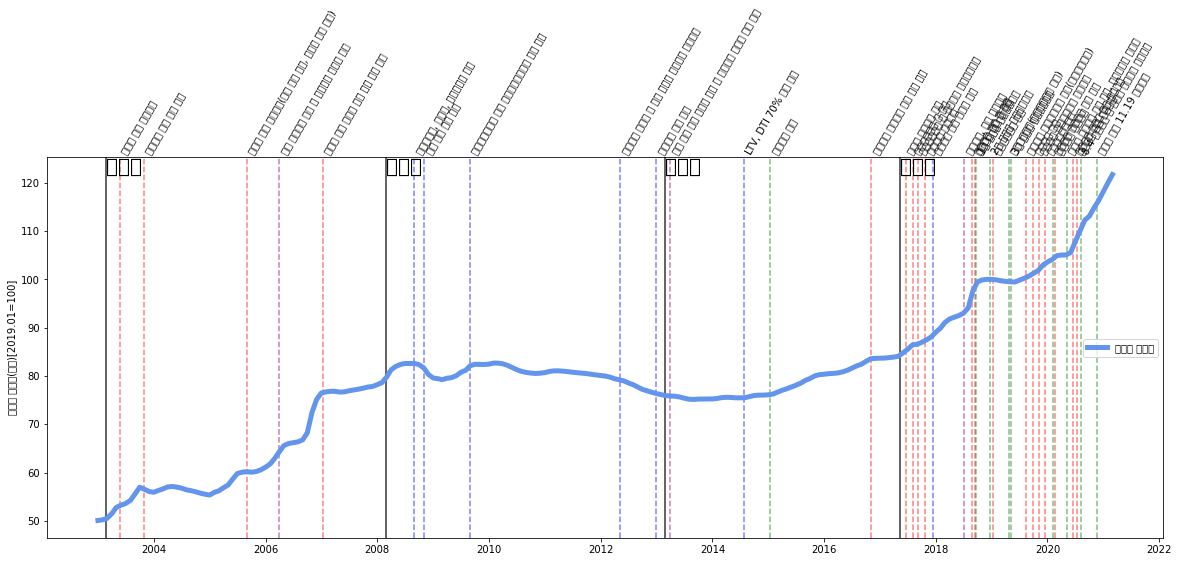

In [ ]:
fig=plt.figure()
fig.set_size_inches(20,7)
ax1=fig.subplots()


color_dict={'완화':'blue', '규제':'red', '공급':'green', '지원':'purple'} #색깔 지정

for i in policy_list.index: #정책 표시
    plt.axvline(x=i, linestyle='--', color=color_dict[policy_list.loc[i, '방향']], alpha=0.5)
    plt.text(x=i, y=126, s=policy_list.loc[i,'정책'], rotation=60, fontsize=10)
    
for i in president.index: #대통령 표시
    plt.axvline(x=president.loc[i, '재임'], linestyle='-', color='black', alpha=0.8)
    plt.text(x=president.loc[i, '재임'], y=122, s=i, fontsize=20, weight='bold')
    
plt.plot(house_sell_level.loc['2003':, ['아파트(서울)[2019.01=100]']], linewidth=5, label='아파트 매매가', color='cornflowerblue') #그래프 표시

#범례 표시
ax1.legend(loc='center right')
ax1.set_ylabel('아파트 매매가(서울)[2019.01=100]')
plt.xlim('2003-01-01', house_sell_level.index[-1])
plt.show()

위 그래프와 같이 노무현 정권때 올랐던 매매가가 이명박, 박근혜 정권에는 주춤하다 다시금 오르는 모습을 보이고 있다. 하지만 문재인 정권에 들어서는 눈에띄게 급격하게 상승하고 있는것을 확인할 수 있다.

## 1-1(2). 문재인 정권 단독

ConversionError: ignored

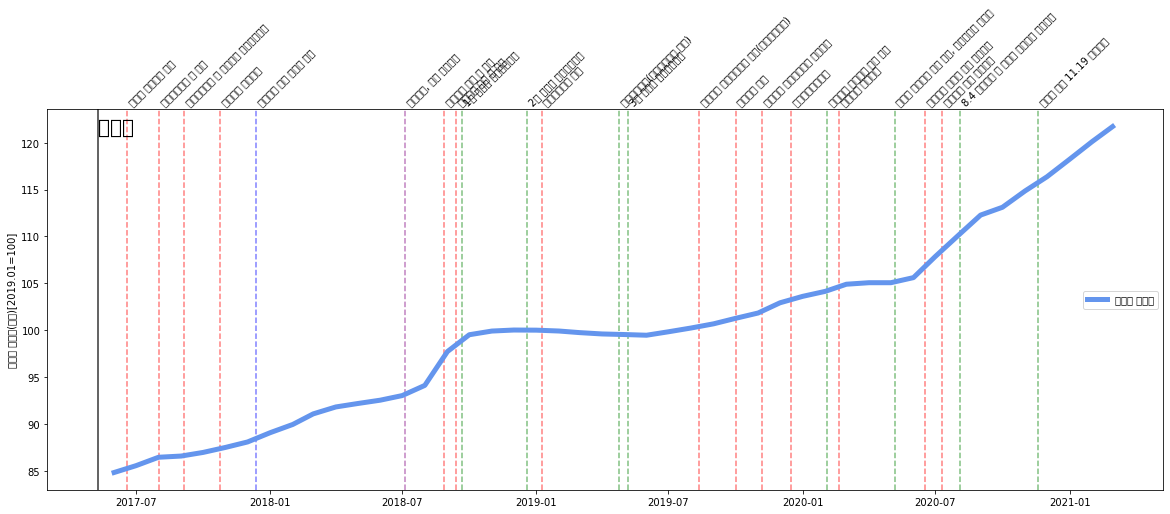

In [ ]:
fig = plt.figure()
fig.set_size_inches(20,7)
ax1 = fig.subplots()

#색깔 지정
color_dict={'완화':'blue', '규제':'red', '공급':'green', '지원':'purple'}

#정책 표시
for i in policy_list['2017-06-19':].index:
    plt.axvline(x = i, linestyle = '--', color = color_dict[policy_list.loc[i,'방향']], alpha = 0.5)
    plt.text(x = i,y = 124 , s = policy_list.loc[i,'정책'], rotation = 45, fontsize = 10)

#대통령 표시
plt.axvline(x = president.loc[president.index[-1],'재임'], linestyle = '-', color = 'black', alpha = 0.8)
plt.text(x = president.loc[president.index[-1],'재임'],y = 121 , s = president.index[-1], fontsize = 20, weight = 'bold')       

#그래프 표시
plt.plot(house_sell_level.loc['2017-05-10':,['아파트(서울)[2019.01=100]']], linewidth = 5, label = '아파트 매매가', color='cornflowerblue')

#범례 표시
ax1.legend(loc = 'center right')    
ax1.set_ylabel('아파트 매매가(서울)[2019.01=100]')
plt.xlim('2017-05-10', house_sell_level.index[-1])
plt.show()

그래프를 보면 급격히 상승하는 구간이 두 구간이 존재한다. 2018년 9~10월과 2020년 6월쯤으로 보이는데 두 시기의 정책을 보면 모두 주택 공급과 관련된 정책이라는 것을 알 수 있다. 

#### 이번에는 그럼 전세 가격에 대해서 분석을 해보자.

## 1-2(1). 노무현~문재인 정권 아파트 전세가 분석

ConversionError: ignored

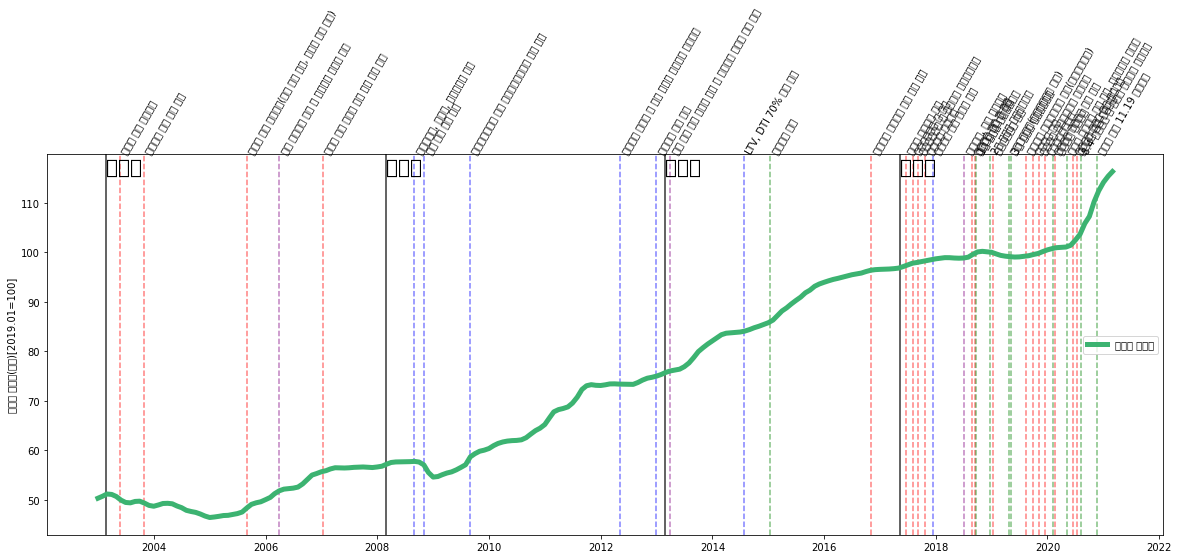

In [ ]:
fig=plt.figure()
fig.set_size_inches(20,7)
ax1=fig.subplots()

#색깔 지정
color_dict={'완화':'blue', '규제':'red', '공급':'green', '지원':'purple'}

#정책 표시
for i in policy_list.index:
    plt.axvline(x=i, linestyle='--', color=color_dict[policy_list.loc[i, '방향']], alpha=0.5)
    plt.text(x=i, y=120, s=policy_list.loc[i,'정책'], rotation=60, fontsize=10)
    
#대통령 표시
for i in president.index:
    plt.axvline(x=president.loc[i, '재임'], linestyle='-', color='black', alpha=0.8)
    plt.text(x=president.loc[i, '재임'], y=116, s=i, fontsize=20, weight='bold')
    
#그래프 표시
plt.plot(house_borrow_level.loc['2003':, ['아파트(서울)[2019.01=100]']], linewidth=5, label='아파트 전세가', color='mediumseagreen')

#범례 표시
ax1.legend(loc='center right')
ax1.set_ylabel('아파트 전세가(서울)[2019.01=100]')
plt.xlim('2003-01-01', house_borrow_level.index[-1])
plt.show()

그래프를 보면 전체적으로 전세가는 계속 상승하는 것을 알 수 있다. 하지만 문재인 정권 중, 후반에 들어서 가파르게 올라가는 모습을 확인할 수 있다.

## 1-2(2). 문재인 정권 단독

ConversionError: ignored

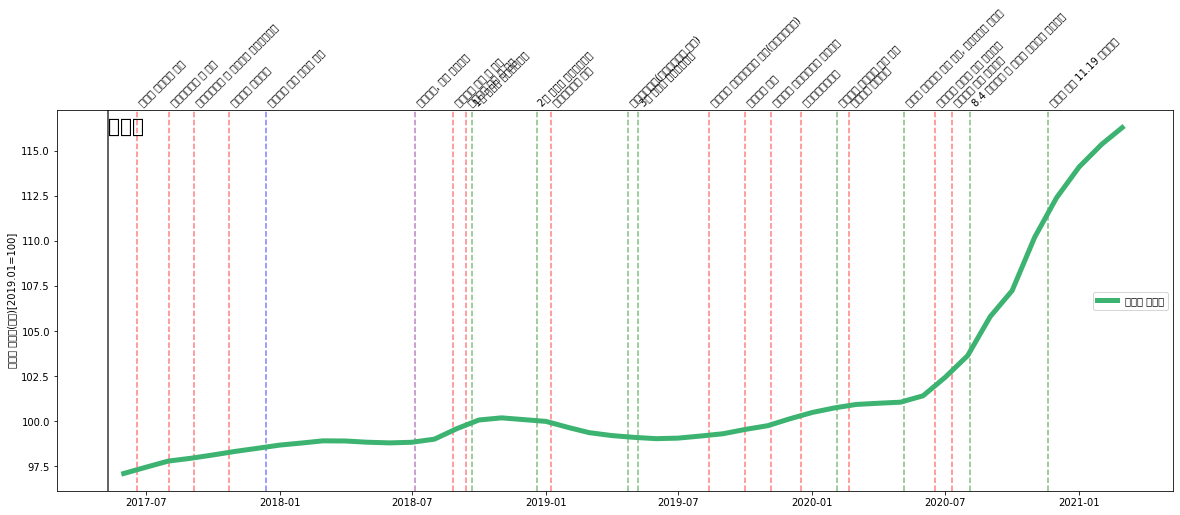

In [ ]:
fig = plt.figure()
fig.set_size_inches(20,7)
ax1 = fig.subplots()

#색깔 지정
color_dict={'완화':'blue', '규제':'red', '공급':'green', '지원':'purple'}

#정책 표시
for i in policy_list['2017-06-19':].index:
    plt.axvline(x = i, linestyle = '--', color = color_dict[policy_list.loc[i,'방향']], alpha = 0.5)
    plt.text(x = i,y = 117.5 , s = policy_list.loc[i,'정책'], rotation = 45, fontsize = 10)

#대통령 표시
plt.axvline(x = president.loc[president.index[-1],'재임'], linestyle = '-', color = 'black', alpha = 0.8)
plt.text(x = president.loc[president.index[-1],'재임'],y = 116 , s = president.index[-1], fontsize = 20, weight = 'bold')       

#그래프 표시
plt.plot(house_borrow_level.loc['2017-05-10':,['아파트(서울)[2019.01=100]']], linewidth = 5, label = '아파트 전세가', color='mediumseagreen')

#범례 표시
ax1.legend(loc = 'center right')    
ax1.set_ylabel('아파트 전세가(서울)[2019.01=100]')
plt.xlim('2017-05-10', house_borrow_level.index[-1])
plt.show()

이번에도 급격하게 오르기 시작하는 시기가 보이는데 약 2020년 5~6월 쯤으로 아까 매매 가격에서 나온 시기와 똑같은 시점이다.

전세와 매매에 대해서 정리하면 전세의 경우에는 계속 오르는 추세이지만 매매의 경우에는 박근혜 정권 말 이후 문재인 정권까지 급격한 상승이 이루어졌다는 것을 알 수 있다. 또한 2020년 5~6월쯤에 실시한 주택 공급 정책이 부동산 가격에 영향을 미치고 있다는 것도 확인할 수 있다.

그래프를 종합해서 보면 아래와 같다.

### 대통령 임기별 매매가와 전세가 종합

ConversionError: ignored

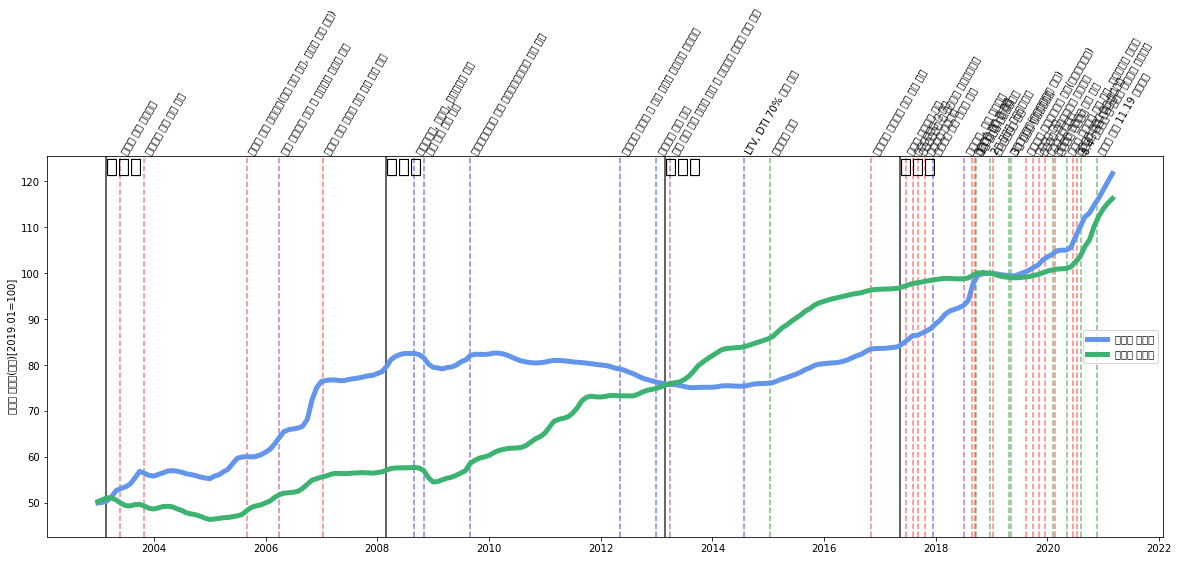

In [ ]:
fig=plt.figure()
fig.set_size_inches(20,7)
ax1=fig.subplots()

#색깔 지정
color_dict={'완화':'blue', '규제':'red', '공급':'green', '지원':'purple'}

#정책 표시
for i in policy_list.index:
    plt.axvline(x=i, linestyle='--', color=color_dict[policy_list.loc[i, '방향']], alpha=0.5)
    plt.text(x=i, y=126, s=policy_list.loc[i,'정책'], rotation=60, fontsize=10)
    
#대통령 표시
for i in president.index:
    plt.axvline(x=president.loc[i, '재임'], linestyle='-', color='black', alpha=0.8)
    plt.text(x=president.loc[i, '재임'], y=122, s=i, fontsize=20, weight='bold')
    
#그래프 표시
plt.plot(house_sell_level.loc['2003':, ['아파트(서울)[2019.01=100]']], linewidth=5, label='아파트 매매가', color='cornflowerblue')
plt.plot(house_borrow_level.loc['2003':, ['아파트(서울)[2019.01=100]']], linewidth=5, label='아파트 전세가', color='mediumseagreen')

#범례 표시
ax1.legend(loc='center right')
ax1.set_ylabel('아파트 매매가(서울)[2019.01=100]')
plt.xlim('2003-01-01', house_sell_level.index[-1])
plt.show()

### 문재인 정권 매매가와 전세가 종합

ConversionError: ignored

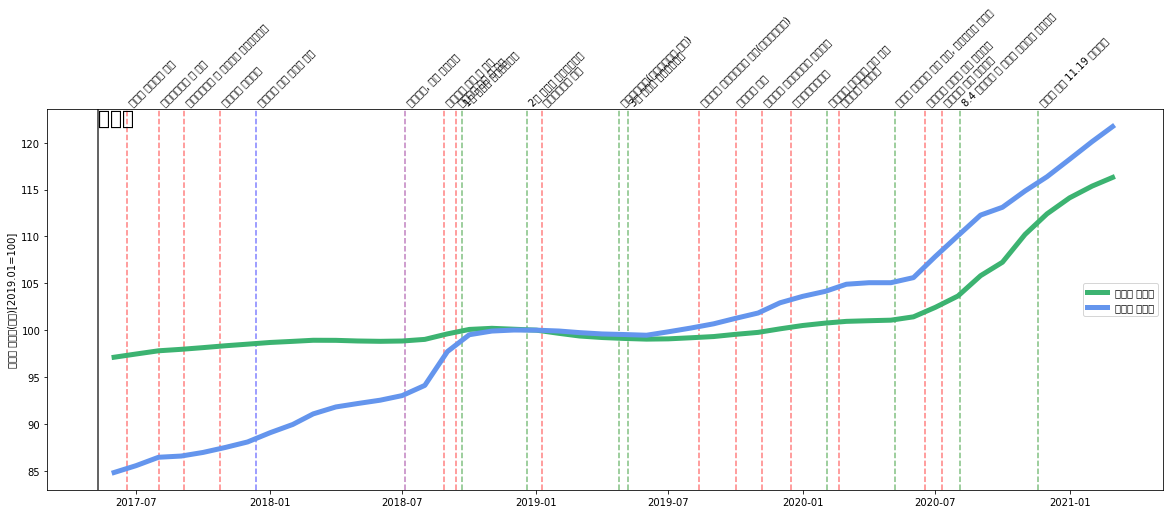

In [ ]:
fig = plt.figure()
fig.set_size_inches(20,7)
ax1 = fig.subplots()

#색깔 지정
color_dict={'완화':'blue', '규제':'red', '공급':'green', '지원':'purple'}

#정책 표시
for i in policy_list['2017-06-19':].index:
    plt.axvline(x = i, linestyle = '--', color = color_dict[policy_list.loc[i,'방향']], alpha = 0.5)
    plt.text(x = i,y = 124 , s = policy_list.loc[i,'정책'], rotation = 45, fontsize = 10)

#대통령 표시
plt.axvline(x = president.loc[president.index[-1],'재임'], linestyle = '-', color = 'black', alpha = 0.8)
plt.text(x = president.loc[president.index[-1],'재임'],y = 122 , s = president.index[-1], fontsize = 20, weight = 'bold')       

#그래프 표시
plt.plot(house_borrow_level.loc['2017-05-10':,['아파트(서울)[2019.01=100]']], linewidth = 5, label = '아파트 전세가', color='mediumseagreen')
plt.plot(house_sell_level.loc['2017-05-10':,['아파트(서울)[2019.01=100]']], linewidth = 5, label = '아파트 매매가', color='cornflowerblue')

#범례 표시
ax1.legend(loc = 'center right')    
ax1.set_ylabel('아파트 전세가(서울)[2019.01=100]')
plt.xlim('2017-05-10', house_borrow_level.index[-1])
plt.show()

가격이 오르는 이유에 대해 근본적으로는 해당 아파트가 들어선 지가가 역시 많은 영향을 끼쳤을거라고 생각한다. 부동산 가격이 아파트 가격 자체에도 문제가 있지만 근본적으로는 지가가 어떻게 변화했냐에 따라서 그 자리에 아파트를 짓기때문이다.

#### 그러면 지가가 어떻게 변동해왔는지 지가변동률에 따른 임기별 변화를 지도로 표현을 해보았다.

# 2. 대통령 임기별 지가변동률 지도 표현

In [ ]:
presidents

['노무현', '이명박', '박근혜', '문재인']

In [ ]:
def site_price(president_ix):
    #대통령별 임기의 시작과 끝 날짜를 표현
    president_num=presidents[president_ix]
    if president_num == '노무현':
        start = '2005-01-01'
    else:
        start = presidents_inaug_dates[president_num][:-2] + '01'
        
    if president_num != '문재인':
        next_president=presidents[president_ix+1]
        end = presidents_inaug_dates[next_president][:-2]+'01'
    else:
        end='2021-02-01'
    
    df=pd.DataFrame()
    data=region_value
    
    #지역에 따라 임기 끝과 시작 데이터 빼서 해당 위치에 넣어줌
    for col in region_value.columns[1:]:
        si=col[:2]
        if si=='서울':
            si_name=si+'특별시'
        elif si == '부산' or si == '대구' or si == '인천' or si == '광주' or si == '대전' or si == '울산':
            si_name = si + '광역시'
        elif si == '세종':
            si_name = si + '특별자치시'
        elif si == '제주':
            si_name = si + '특별자치도'
        else:
            si = si + '도'
            if si[:2] == '경기' or si[:2] == '강원':
                si_name = si
            elif si[0] == '충':
                si_name = si[0] + '청' + si[1:]
            elif si[0] == '전':
                si_name = si[0] + '라' + si[1:]
            elif si[0] == '경':
                si_name = si[0] + '상' + si[1:]
        df.loc[si_name, 'value'] = (data[col].loc[end] - data[col].loc[start])
    df['province'] = df.index
    
    #지도 그래프 설정
    f=folium.Figure(width=500, height=400)
    m=folium.Map(location=[36, 127.5], tiles="cartodbpositron", zoom_start=6, min_zoom=6, max_zoom=6, dragging=False)
    m.choropleth(
        #지도 가져오기
        geo_data=geo_data_sido,
        #데이터 가져오기
        data=df,
        #색깔 지정하기
        fill_color="RdBu_r",
        #변동폭 지정하기
        bins=[-0.60, -0.40, -0.20, 0.0, 0.20, 0.40, 0.60],
        #열 지정하기
        columns=['province', 'value'],
        #키 값에 CTP_KOR_NM에 맞춰 지도에 넣어주기
        key_on="properties.CTP_KOR_NM",
        #범례 표현하기
        legend_name=f"{president_num} 대통령 임기 시작과 끝 지가변동률(%)"
    )
    m.add_to(f)
    return f

### 노무현 대통령

In [ ]:
site_price(0)

### 이명박 대통령

In [ ]:
site_price(1)

### 박근혜 대통령

In [ ]:
site_price(2)

### 문재인 대통령

In [ ]:
site_price(3)

위의 지도를 보게 되면 박근혜 정부때 지가 변동률이 제일 큰 것이 확인된다.
지가 자체는 해당 정권 시기에 바로 오르기 보단 이전 정권의 정책에서의 영향이 몇년 뒤에 반영 되기 때문이다.

따라서 이명박 정권때의 정책이 크게 반영된것을 확인할 수 있다.

## 2-1. 지가 변동에 영향을 주는 데이터
지가 변동에는 해당 지역에 건축 계획이 많이 잡혀있기 때문에 증가한다고 볼 수 있다.

따라서 건축허가현황과 주택건설인허가실적 데이터가 영향이 클거라 생각해 그것과 관련해 데이터를 분석해보았다

In [ ]:
#건축허가현황
c_allow.head(3)

연면적-철근·철골조[㎡]  연면적-조적조[㎡]  ...  동수-자재별[동수]  동수-용도별[동수]
날짜                                     ...                        
2000-08-01      3898712.0    122063.0  ...      6671.0      6671.0
2000-09-01      3055754.0    113586.0  ...      5901.0      5901.0
2000-10-01      4104565.0    134648.0  ...      7504.0      7504.0

[3 rows x 22 columns]

In [ ]:
#주택건설인허가실적
c_real_allow.head(3)

전국[호]   부산[호]   충북[호]   충남[호]  ...   부문별[호]  세종[호]   서울[호]   울산[호]
날짜                                           ...                                
2007-01-01  12038.0   455.0   188.0  1004.0  ...  12038.0    NaN  1530.0   183.0
2007-02-01  29789.0  1554.0   493.0  2310.0  ...  29789.0    NaN  2324.0  1356.0
2007-03-01  49827.0  3675.0  1187.0  4200.0  ...  49827.0    NaN  4212.0  2041.0

[3 rows x 21 columns]

이 데이터들 역시 대통령 임기별로 구분해서 나타내보겠다
### 2-1(1). 건축허가현황

In [ ]:
fig=plt.figure(figsize=(20,7))
sns.lineplot(data=c_allow)
plt.show()

#### 여기서 우리가 봐야할 것은 주거와 관련된 내용이므로 '연면적-주거용'에 대한 데이터를 임기별로 구분해서 선그래프로 나타내준다.

In [ ]:
fig=plt.figure()
fig.set_size_inches(20,7)
ax1=fig.subplots()
    
#대통령 표시
for i in president.index:
    plt.axvline(x=president.loc[i, '재임'], linestyle='-', color='black', alpha=0.8)
    plt.text(x=president.loc[i, '재임'], y=9000000, s=i, fontsize=30, weight='bold')
    
#그래프 표시
plt.plot(c_allow.loc['2003':, ['연면적-주거용[㎡]']], linewidth=3, label='주거허가', color='green')

#범례 표시
ax1.legend(loc='center right')
ax1.set_ylabel('건축허가현황')
plt.xlim('2003-01-01', c_allow.index[-1])
plt.show()

#### 위 그래프를 통해 박근혜 정권 시기에 주거 건축허가현황이 가장 많았다는 것을 확인할 수 있다.

### 2-1(2). 주택건설인허가실적

In [ ]:
fig=plt.figure(figsize=(20,7))
sns.lineplot(data=c_real_allow)
plt.show()

#### 주택건설인허가실적에서는 전국, 서울, 경기권을 중심으로 표현을 해보겠다.

In [ ]:
fig=plt.figure()
fig.set_size_inches(20,7)
ax1=fig.subplots()
    
#2007년 시작 데이터라 재임을 2007-01-01로 바꾸어서 표현
president.loc[president.index[0],'재임']='2007-01-01'
president['재임']=pd.to_datetime(arg=president['재임'], format="%Y-%m-%d")  
    
#대통령 표시
for i in president.index:
    plt.axvline(x=president.loc[i, '재임'], linestyle='-', color='black', alpha=0.8)
    plt.text(x=president.loc[i, '재임'], y=750000, s=i, fontsize=30, weight='bold')
    
#그래프 표시
plt.plot(c_real_allow.loc['2007':, ['전국[호]']], linewidth=3, label='전국[호]', color='blue')
plt.plot(c_real_allow.loc['2007':, ['서울[호]']], linewidth=3, label='서울[호]', color='red')
plt.plot(c_real_allow.loc['2007':, ['경기[호]']], linewidth=3, label='경기[호]', color='green')

#범례 표시
ax1.legend(loc='center right')
ax1.set_ylabel('주택건설인허가실적')
plt.xlim('2007-01-01', c_real_allow.index[-1])
plt.show()

#다시 원래 재임 날짜로 바꾸어줌
president.loc[president.index[0],'재임']='2003-02-25'
president['재임']=pd.to_datetime(arg=president['재임'], format="%Y-%m-%d")

#### 주택건설인허가에서도 역시 이명박~박근혜 정권까지 증가하는 것이 확인되고 문재인 정권에서는 계속 줄어들고 있는것이 확인된다.
### 그렇다면 문재인 정권에서 실시한 공급 관련 정책에는 무엇이 있을까?

In [ ]:
gong=policy_list.loc[policy_list['방향']=='공급']

In [ ]:
gong.loc['2017-08':]

대통령  구분  방향                         정책
연도                                                
2018-09-21  문재인  진보  공급              1차 수도권 주택공급계획
2018-12-19  문재인  진보  공급              2차 수도권 주택공급계획
2019-04-24  문재인  진보  공급          주거종합계획(공적임대주택 계획)
2019-05-07  문재인  진보  공급              3차 수도권 주택공급계획
2020-05-06  문재인  진보  공급  수도권 주택공급 기반 강화, 공공재개발 활성화
2020-08-04  문재인  진보  공급   8.4 서울권역 등 수도권 주택공급 확대방안
2020-11-19  문재인  진보  공급          전세난 겨냥 11.19 주택대책
2020-02-04  문재인  진보  공급            대도시권 주택공급 확대 방안

공급 관련 정책에는 위와 같이 총 8개나 되는 정책있다. 그만큼 공급이 많았으면 미분양 주택도 늘고 가격도 떨어지는게 일반적이다. 

그러면 해당 기간 미분양주택과 가격은 어떻게 되었을까?

## 2-2. 미분양주택현황과 아파트실거래가격지수 분석

In [ ]:
first_empty.head(3)

전국[호]  서울[호]   부산[호]   대구[호]  ...    경남[호]  제주[호]  수도권[호]  세종[호]
날짜                                          ...                               
2007-01-01  75616.0  697.0  8680.0  9467.0  ...  11772.0   77.0  4544.0    NaN
2007-02-01  73619.0  590.0  8653.0  9134.0  ...  11563.0   96.0  4263.0    NaN
2007-03-01  73162.0  687.0  8548.0  9189.0  ...  11328.0  188.0  3532.0    NaN

[3 rows x 19 columns]

In [ ]:
real_apt_cont.head(3)

도심권[2017.11=100]  ...  지방[2017.11=100]
날짜                            ...                 
2006-01-01              59.3  ...             59.1
2006-02-01              58.1  ...             59.2
2006-03-01              59.5  ...             59.2

[3 rows x 28 columns]

### 2-2(1). 미분양주택현황

In [ ]:
fig=plt.figure(figsize=(20,7))
sns.lineplot(data=first_empty)
plt.show()

#### 이 중에서 전국, 서울, 경기에 대한 미분양주택현황을 알아보겠다

In [ ]:
fig=plt.figure()
fig.set_size_inches(20,7)
ax1=fig.subplots()

#2007년 시작 데이터라 재임을 2007-01-01로 바꾸어서 표현
president.loc[president.index[0],'재임']='2007-01-01'
president['재임']=pd.to_datetime(arg=president['재임'], format="%Y-%m-%d")

#대통령 표시
for i in president.index:
    plt.axvline(x=president.loc[i, '재임'], linestyle='-', color='black', alpha=0.8)
    plt.text(x=president.loc[i, '재임'], y=160000, s=i, fontsize=20, weight='bold')
    
#건축허가현황
plt.plot(first_empty.loc['2007':, ['전국[호]']], linewidth=3, label='전국[호]', color='blue')
plt.plot(first_empty.loc['2007':, ['서울[호]']], linewidth=3, label='서울[호]', color='red')
plt.plot(first_empty.loc['2007':, ['경기[호]']], linewidth=3, label='경기[호]', color='purple')

#범례 표시
ax1.legend(loc='center right')
ax1.set_ylabel('미분양주택현황')
plt.xlim('2007-01-01', first_empty.index[-1])
plt.show()

#다시 원래 재임 날짜로 바꾸어줌
president.loc[president.index[0],'재임']='2003-02-25'
president['재임']=pd.to_datetime(arg=president['재임'], format="%Y-%m-%d")

이명박 정권때까지는 노무현 정권때의 규제 정책이 많아 미분양 주택이 굉장히 많았다. 하지만 이후에는 완화, 공급 정책이 많아지면서 미분양 주택이 기하급수적으로 줄어드는 것이 확인된다. 그러나 문재인 정권 중반 이후에는 미분양 주택이 사실상 거의 없다는 것이 확인된다.

### 2-2(1). 문재인 정권 단독

In [ ]:
fig=plt.figure()
fig.set_size_inches(20,7)
ax1=fig.subplots()

#공급 정책에 관한 시기 표시
color_dict={'공급':'magenta'}
for i in policy_list['2017-06-19':].index:
    if policy_list.loc[i,'방향']=='공급':
        plt.axvline(x = i, linestyle = '-', color = color_dict[policy_list.loc[i,'방향']], alpha = 0.5)
        plt.text(x = i,y = 68000 , s = policy_list.loc[i,'정책'], rotation = 20, fontsize = 10)
    
#대통령 표시
plt.axvline(x = president.loc[president.index[-1],'재임'], linestyle = '-', color = 'black', alpha = 0.8)
plt.text(x = president.loc[president.index[-1],'재임'],y = 62000 , s = president.index[-1], fontsize = 20, weight = 'bold')
    
#건축허가현황
plt.plot(first_empty.loc['2017-05-10':, ['전국[호]']], linewidth=3, label='전국[호]', color='blue')
plt.plot(first_empty.loc['2017-05-10':, ['서울[호]']], linewidth=3, label='서울[호]', color='red')
plt.plot(first_empty.loc['2017-05-10':, ['경기[호]']], linewidth=3, label='경기[호]', color='green')

#범례 표시
ax1.legend(loc='center right')
ax1.set_ylabel('미분양주택현황')
plt.xlim('2017-05-10', first_empty.index[-1])
plt.show()

문재인 임기 동안에서 전국, 서울, 경기에 대해서 미분양주택현황을 표시했다. 분홍색 수직선은 문재인 정권이 실시한 부동산 공급 정책에 관하여 표시한 시기이다.

수차례의 주택공급계획이 많았음에도 불구하고 3차 수도권 주택공급계획 이후로 급격하게 미분양주택이 줄어드는 것을 확인할 수 있다. 이것은 공급이 적었다 또는 공급이 따라가지 못할정도로 수요가 폭팔했다는 것으로 확인할 수 있다.

#### 무엇보다 수도권 주택공급계획인데도 서울의 미분양주택은 계속 바닥을 찍고 있다.

### 2-2(2). 아파트실거래가격지수

In [ ]:
fig=plt.figure(figsize=(20,7))
sns.lineplot(data=real_apt_cont)
plt.show()

#### 이 중에서 서울, 서북권, 서남권, 수도권, 경기, 전국에 대해서만 추출해서 보겠다.

In [ ]:
fig=plt.figure()
fig.set_size_inches(20,7)
ax1=fig.subplots()
#2006년 시작 데이터라 재임을 2006-01-01로 바꾸어서 표현
president.loc[president.index[0],'재임']='2006-01-01'
president['재임']=pd.to_datetime(arg=president['재임'], format="%Y-%m-%d")

#대통령 표시
for i in president.index:
    plt.axvline(x=president.loc[i, '재임'], linestyle='-', color='black', alpha=0.8)
    plt.text(x=president.loc[i, '재임'], y=162, s=i, fontsize=20, weight='bold')
    
#건축허가현황
plt.plot(real_apt_cont.loc['2006':, ['전국[2017.11=100]']], linewidth=1, label='전국[2017.11=100]', color='blue')
plt.plot(real_apt_cont.loc['2006':, ['수도권[2017.11=100]']], linewidth=1, label='수도권[2017.11=100]', color='red')
plt.plot(real_apt_cont.loc['2006':, ['서울[2017.11=100]']], linewidth=1, label='서울[2017.11=100]', color='purple')
plt.plot(real_apt_cont.loc['2006':, ['서북권[2017.11=100]']], linewidth=1, label='서북권[2017.11=100]', color='green')
plt.plot(real_apt_cont.loc['2006':, ['서남권[2017.11=100]']], linewidth=1, label='서남권[2017.11=100]', color='brown')
plt.plot(real_apt_cont.loc['2006':, ['경기[2017.11=100]']], linewidth=1, label='경기[2017.11=100]', color='yellow')

#범례 표시
ax1.legend(loc='center right')
ax1.set_ylabel('아파트실거래가격지수')
plt.xlim('2006-01-01', real_apt_cont.index[-1])
plt.show()

#다시 원래 재임 날짜로 바꾸어줌
president.loc[president.index[0],'재임']='2003-02-25'
president['재임']=pd.to_datetime(arg=president['재임'], format="%Y-%m-%d")

문재인 정권전까지는 전체적으로 아파트가격이 전 지역이 골고루 일정하게 유지되는 것을 확인할 수 있다.
하지만 문재인 정권이후에는 전체적으로 급격한 상승을 보이고 있다.
특히 서울, 서북권, 서남권의 가격은 다른 지역보다도 엄청나게 상승한 것을 확인할 수 있다.

### 2-2(2). 문재인 정권 단독

In [ ]:
fig=plt.figure()
fig.set_size_inches(20,7)
ax1=fig.subplots()

#공급 정책에 관한 시기 표시
color_dict={'공급':'magenta'}
for i in policy_list['2017-06-19':].index:
    if policy_list.loc[i,'방향']=='공급':
        plt.axvline(x = i, linestyle = '-', color = color_dict[policy_list.loc[i,'방향']], alpha = 0.5)
        plt.text(x = i,y = 167 , s = policy_list.loc[i,'정책'], rotation = 20, fontsize = 10)
    
#대통령 표시
plt.axvline(x = president.loc[president.index[-1],'재임'], linestyle = '-', color = 'black', alpha = 0.8)
plt.text(x = president.loc[president.index[-1],'재임'],y = 162 , s = president.index[-1], fontsize = 20, weight = 'bold')
    
#건축허가현황
plt.plot(real_apt_cont.loc['2017-05-10':, ['전국[2017.11=100]']], linewidth=1, label='전국[2017.11=100]', color='blue')
plt.plot(real_apt_cont.loc['2017-05-10':, ['수도권[2017.11=100]']], linewidth=1, label='수도권[2017.11=100]', color='red')
plt.plot(real_apt_cont.loc['2017-05-10':, ['서울[2017.11=100]']], linewidth=1, label='서울[2017.11=100]', color='purple')
plt.plot(real_apt_cont.loc['2017-05-10':, ['서북권[2017.11=100]']], linewidth=1, label='서북권[2017.11=100]', color='green')
plt.plot(real_apt_cont.loc['2017-05-10':, ['서남권[2017.11=100]']], linewidth=1, label='서남권[2017.11=100]', color='brown')
plt.plot(real_apt_cont.loc['2017-05-10':, ['경기[2017.11=100]']], linewidth=1, label='경기[2017.11=100]', color='yellow')

#범례 표시
ax1.legend(loc='center right')
ax1.set_ylabel('아파트실거래가격지수')
plt.xlim('2017-05-10', real_apt_cont.index[-1])
plt.show()

문재인 임기 동안에서 전국, 수도권, 서울, 서북권, 서남권, 경기에 대해서 아파트실거래가격지수를 표시했다. 분홍색 수직선은 문재인 정권이 실시한 부동산 공급 정책에 관하여 표시한 시기이다.

1, 2차 수도권 주택공급계획 이후로는 가격이 잠시 주춤했지만 3차 수도권 주택공급계획 이후로는 가격이 폭발적으로 증가하고 있고 2020년의 수도권 주택공급 기반 강화에서 불을 지피면서 걷잡을 수 없을 정도로 가격이 올라가는 것을 확인할 수 있다.
#### 따라서 공급도 적지만 수요도 많아지면서 가격이 치솟는 것이 확인된다

# 3. 부동산 가격 상승 원인 정리
### 수요가 이렇게까지 늘어난 이유가 무엇인가?
#### 공급이 적은 것도 문제지만 부동산 투기, 외국인 소유주 문제가 크다고 생각한다.
## 1. 부동산 투기

<p align="center">
    <img src = "https://thumb.mt.co.kr/06/2020/06/2020062918001528535_1.jpg/dims/optimize/" width = "500" height = "500">
</p>


[문재인 임기 투기](https://news.mt.co.kr/mtview.php?no=2020062918001528535)

기사에 따르면 문재인 정권에서 부동산 투기를 잡지 못한 이유에는 3가지를 제시한다.
#### 1. 시중의 풍부한 유동성 자금이 부동산 시장으로 쏠렸다.
- 세계 경제 침체와 저금리의 지속화로 투자대비 높은 수익률과 좋은 안전성을 가지는 부동산 투자에 관심이 쏠리다 보니 투기가 늘어날 수 밖에 없게되었다.
#### 2. 도시집중화 현상으로 도시 선호 현상이 커졌다.
- 교육, 행정, 편의 시설 등이 서울로 계속해서 몰리는 현상으로 인해 지방에서 서울로 집중되다보니 수도권 아파트 가격이 오를 수 밖에 없다.
#### 3. 아파트 공급을 늘리는 과정에서 문제가 발생했다.
- 수도권 아파트 공급을 위해선 재건축, 재개발이 불가피한데 이것이 호재로 작용하면서 재건축, 재개발 예정인 아파트들의 가격이 급등 하면서 투기가 남발한다.

#### 이로인한 해결책으로는 

1. 도시 분산화 정책
2. 1주택자의 혜택
3. 2주택 이상자와 임대사업자에 대해서는 규제 강화와 초과이익을 제거

#### 이렇게 3가지에 집중해야한다고 목소리를 높이고 있다

### 2. 외국인 소유주 문제

<p align="center">
    <img src = "https://imgnews.pstatic.net/image/009/2020/07/22/0004620548_002_20200722233102688.jpg?type=w647" width = "700" height = "500">
</p>


[외국인 부동산 규제](https://www.sedaily.com/NewsView/22Q6NV7B0R)

뉴스에 정리된 글에 따르면 현재 우리나라는 외국인에 대한 부동산 투자에 대한 규제가 내국인에 비해 굉장히 가볍고 영향을 받지 않는다는 것을 알 수 있다
#### 1. 해외 불법 자금으로 국내 부동산 투자
-한국이 중국에 비해 비트코인 시세가 높은 점을 이용해 국내 거래소를 통해 가상화폐를 출금하여 세금 및 수수료 없이 부동산을 구매를 한다. 하지만 불법 송금액이 25억원 이하의 경우에는 과태료만 부과한다는 것에서 법에서 굉장히 자유롭다는 것을 확인할 수 있다.
#### 2. 내국인에게는 엄격한 대출 규제, 외국인에게는 규제 대상 제외
-예를 들어 내국인은 규제 지역에 아파트 구매할 경우 LTV를 40% 적용받는다. 매물이 9억원을 넘으면 20%를 대출받을 수 있고 15억원이 넘으면 대출 받을 수 없다. 하지만 외국인 해외에서 자금을 들여와 국내 규제 지역의 부동산을 사면 여기에서 자유로울 수 있다.
#### 3. 외국 집주인이 보증금을 갖고 도주
-집주인이 외국인이라 해도 임대차 보호법상의 대항력을 갖추기 위해 전입신고 하고 확정일자 받으면 된다. 하지만 외국인 집주인이 보증금을 갖고 해외로 도주할 경우 보증금을 돌려받지 못하고 소송과 경매로 배당받아야 한다. 이에 걸리는 기간은 최소 2년 정도라고 한다.



#### 이로 인해 국민의 힘 태영호 의원은

외국인의 국내 주거용 부동산 취득에‘상호주의' 적용할 것을 대표 발의했다. '상호주의'는 상대 국가가 우리 국민의 권리를 허용하는 만큼 우리도 상대 국민에게 동일한 권리를 허용하는 국제법상의 원칙이다.

하지만 이 역시 FTA 체결된 국가들의 관계를 고려할 때 이번 입법 추진에 난항을 겪을 수 있다며 과세를 많이 적용하는 데에는 한계가 있을 거라고 목소리가 나온다.



### 이러한 내용들을 결국 취합해보면
부동산 정책에 대해 전반적인 점검과 더불어 완전히 새로운 부동산 정책을 구성해야 더 이상 이러한 부동산 가격이 급격히 오르는 피해를 조금이라도 줄일 수 있다고 생각한다.

# **III. 인구이동에 따른 부동산 가격 변화**

원인 1. 인구이동

원인 2. 수도권 집중현상 (일자리, 주거, 가족)

### 수도권, 5개 광역시, 지방 사이의 인구이동을 표시하고 지역별 부동산 가격 변동을 살펴보는 방법도 있다 - 인구이동 조사 내가 할 것 

- 비수도권에서 수도권으로 이동은 2004년 이후로 꾸준하게 감소하고, 2011년 이후로 최초로 순유출이 된 이후(2012년 제외), 2017년 이후 순유입으로 전환됨
- 비수도권에서 수도권으로 이동은 서울로의 순유입이 가장 많음
- 출처: KOSIS 국가통계포털 - 국내인구이동통계 - 순이동자수 - 전출지/전입지(시도)별 이동자수 (2000.01~2021.03)
- 서울과 타지역 간의 순이동인구수를 살펴보면, 서울과 경기간의 순이동인구수가 가장 많은 것으로 나타남
- 출처: KOSIS 국가통계포털 - 국내인구이동통계 - 순이동자수 - 전출지/전입지(시도)별 이동자수 (2000.01~2021.03)

- 서울지역의 연령별 순이동인구수를 살펴보면, 20대는 지속적으로 순유입이 나타나나 30대에서는 순유출이 발생
특히, 30-34세에서 지속적으로 순유출이 많은 것으로 나타남
- 출처 : KOSIS 국가통계포털 - 국내인구이동통계 - 순이동자수 - 시군구/성/연령(5세간격)별 이동자수 (2000.01~2021.03)

서울지역 전입사유별 순인구이동
서울지역 중 전십사유별 순인구이동을 살펴보면, 직업/교육/주택이 가장 큰 비중을 차지함
한편, 전입사유 중 '주택'은 2020년에 상당한 순유출을 발생시킴
출처: KOSIS 국가통계포털 - 국내인구이동통계 - 순이동자수 - 시도 및 전입사유별 이동자 수 (2009~2020)


In [ ]:
#ingu = pd.read_csv(r'.\data\공공데이터수집\전입전출인구통계.csv', encoding = 'euc-kr') #Land Price Variation Rate
ingu = pd.read_csv(path+'이주/'+'전입전출인구통계.csv', encoding = 'euc-kr') #Land Price Variation Rate

### 연간 지역별 전입인구 수 시각화

In [ ]:
#지역별 전입 데이터에 대한 전처리함수 
def Cleaning_data(df,region): #스트링으로 입력
    move_to = df[df['전입지별'] == region]
    
    a = move_to[(move_to['전출지별']== region) | (move_to['전출지별']=="전국")].index
    a.to_list()
    move_to.drop([x for x in a],axis=0,inplace=True) 
    
    move_to.drop(["전입지별"],axis=1,inplace=True)
    move_to.set_index(["전출지별"],inplace=True)

    move_to = move_to.transpose()
    
    #move_to.reset_index(inplace=True)
    #move_to = move_to.rename(columns = {'index': 'year'})
    #move_to.set_index(["year"], inplace=True)
    move_to.index = pd.to_datetime(move_to.index).year
    
    move_to.replace("-",np.nan,inplace=True)
    move_to.fillna(0,inplace=True)
    move_to.columns.name = None
    
    return move_to.astype(int)
    

In [ ]:
#전입인구 시각화
def Migration_chart(df,tit):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('2000-2020년 지역 별 '+tit+'시 인구 이동')
    plt.xlabel('Year')
    plt.ylabel('count')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.savefig(tit+'.png')
    plt.show()
    

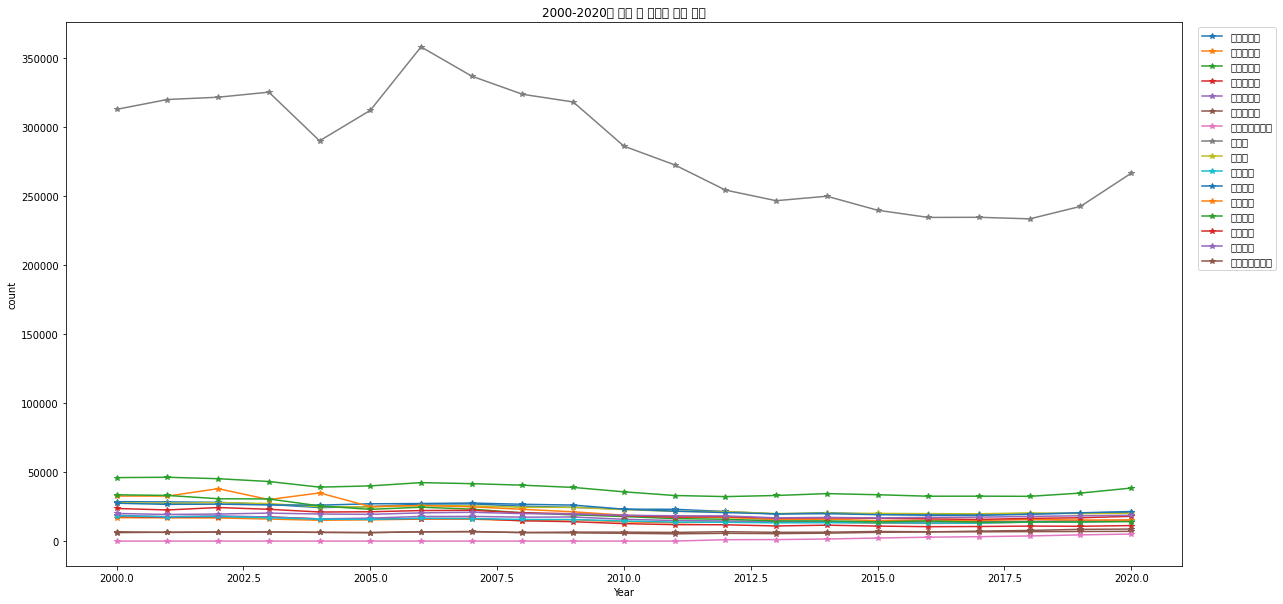

In [ ]:
sl = Cleaning_data(ingu,"서울특별시")
Migration_chart(sl,"서울")

### 부산 전입 인구 수

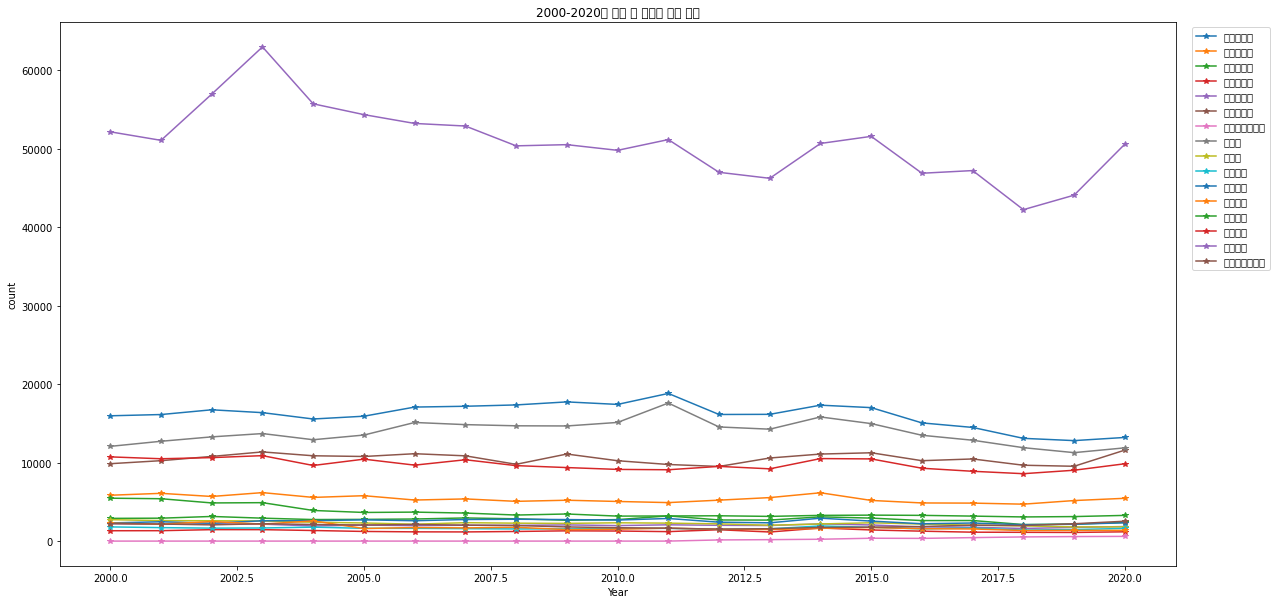

In [ ]:
bs = Cleaning_data(ingu,"부산광역시")
Migration_chart(bs,"부산")

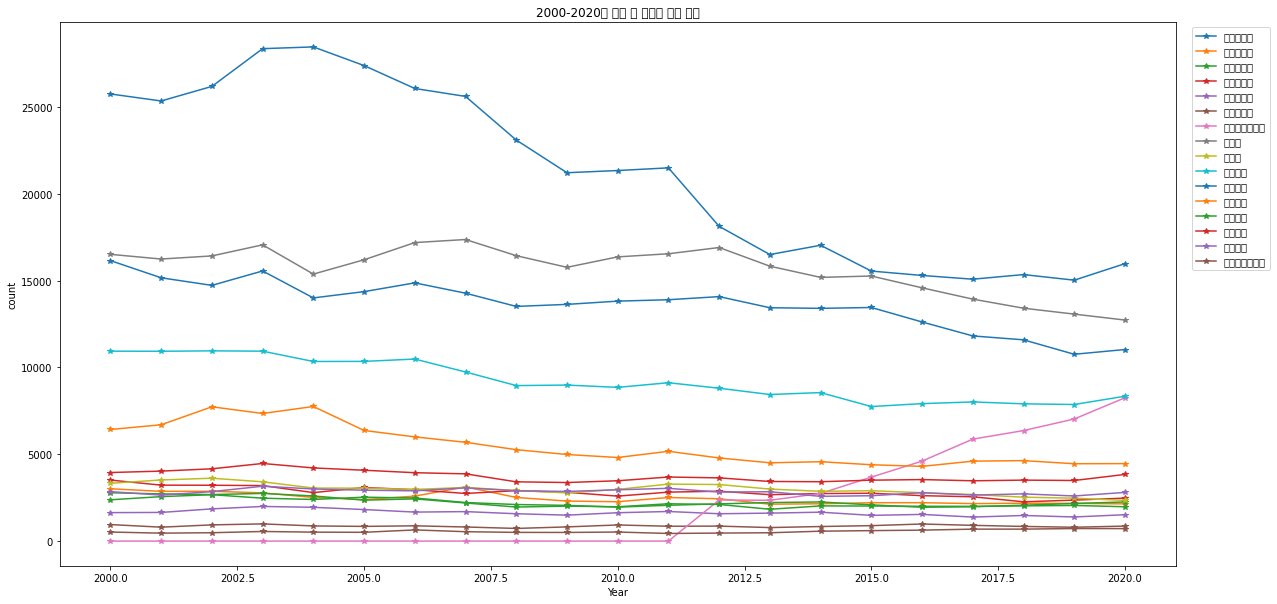

In [ ]:
dg = Cleaning_data(ingu,"대전광역시")
Migration_chart(dg,"대전")

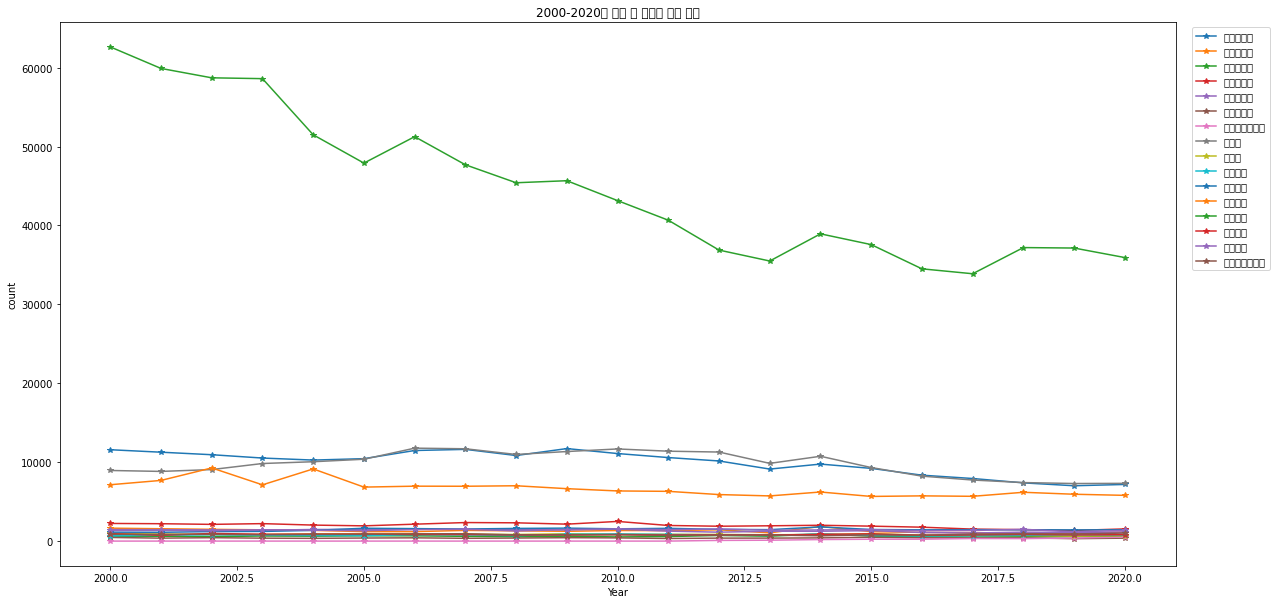

In [ ]:
gj = Cleaning_data(ingu,"광주광역시")
Migration_chart(gj,"광주")

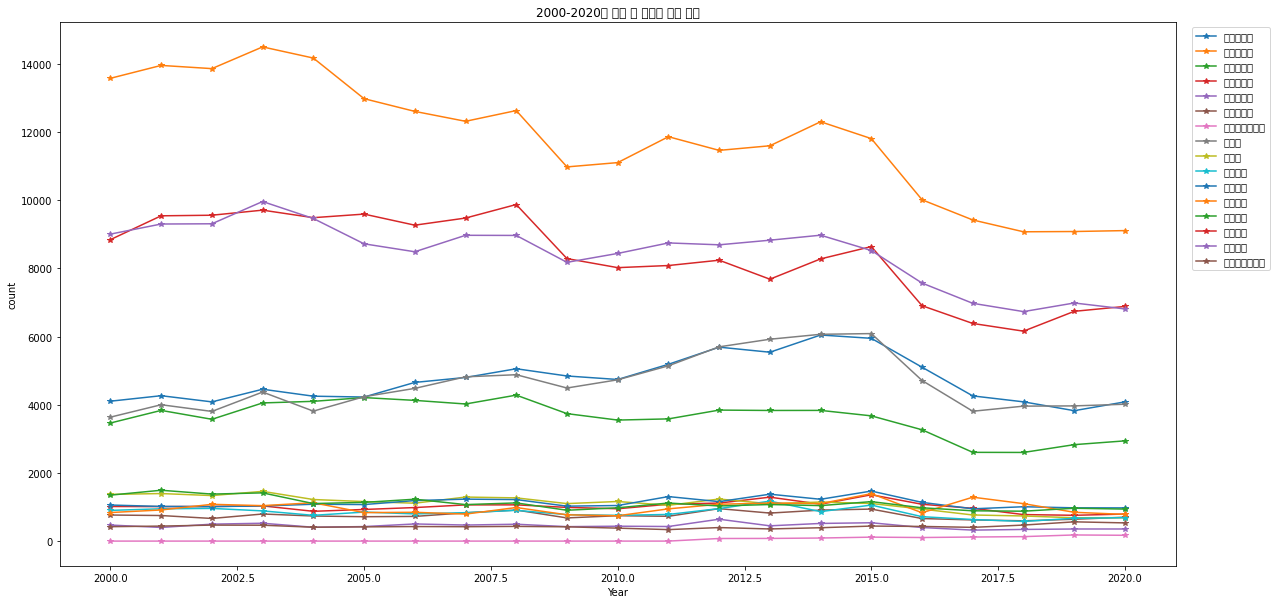

In [ ]:
us = Cleaning_data(ingu,"울산광역시")
Migration_chart(us,"울산")

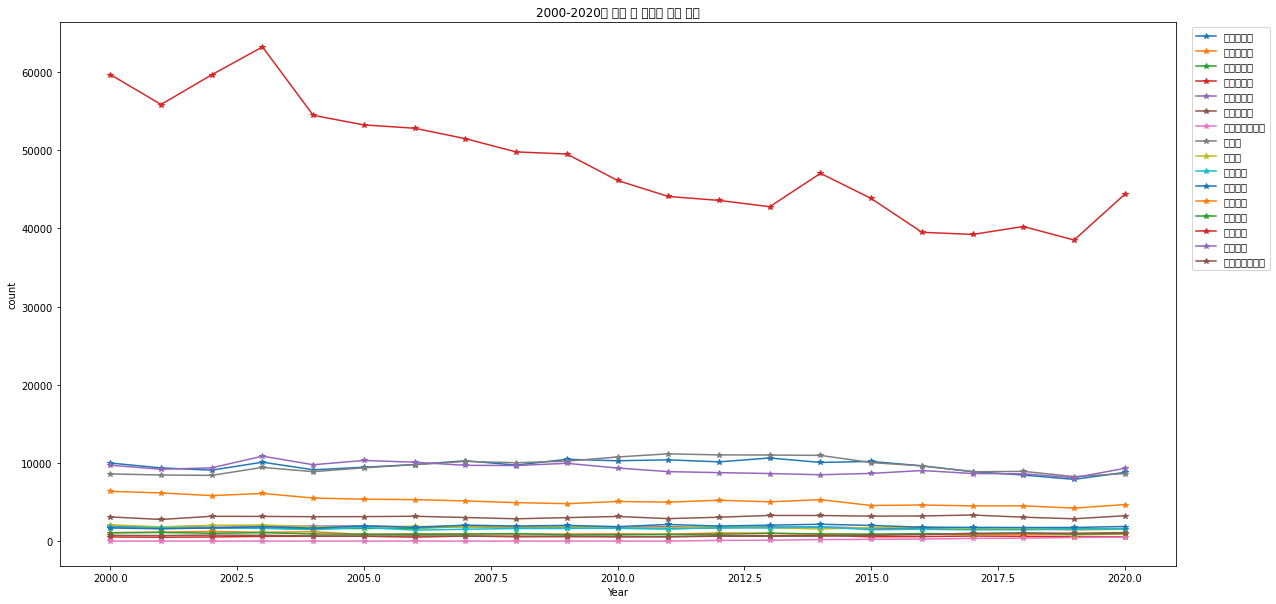

In [ ]:
daeg = Cleaning_data(ingu,"대구광역시")
Migration_chart(daeg,"대구")

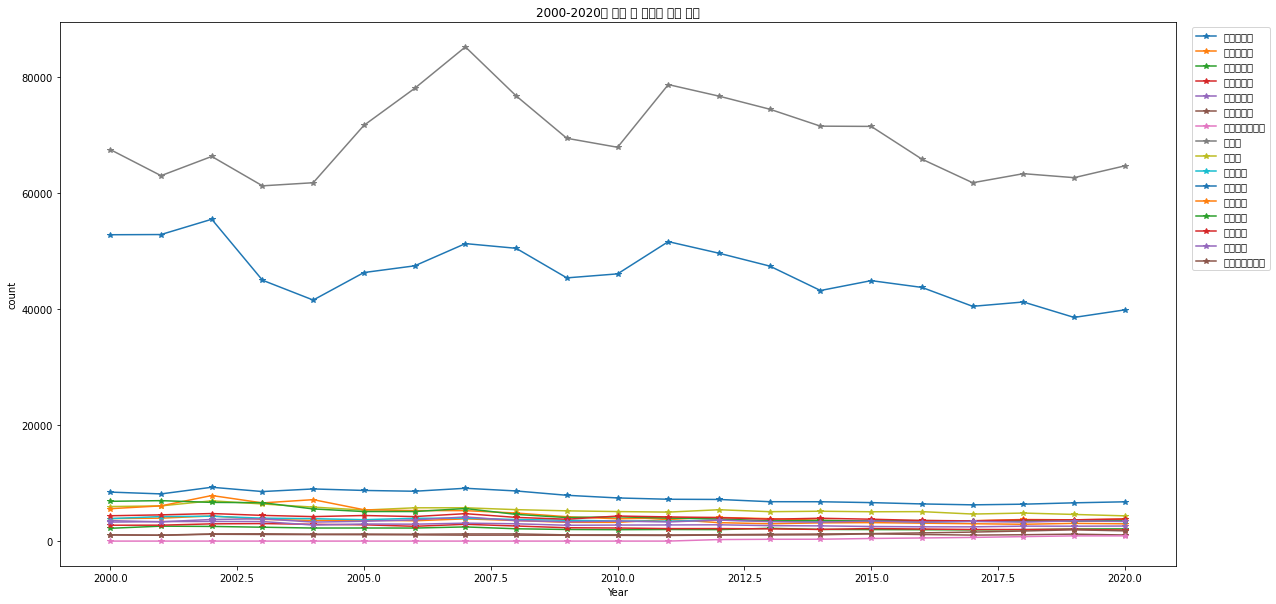

In [ ]:
ic = Cleaning_data(ingu,"인천광역시")
Migration_chart(ic,"인천")

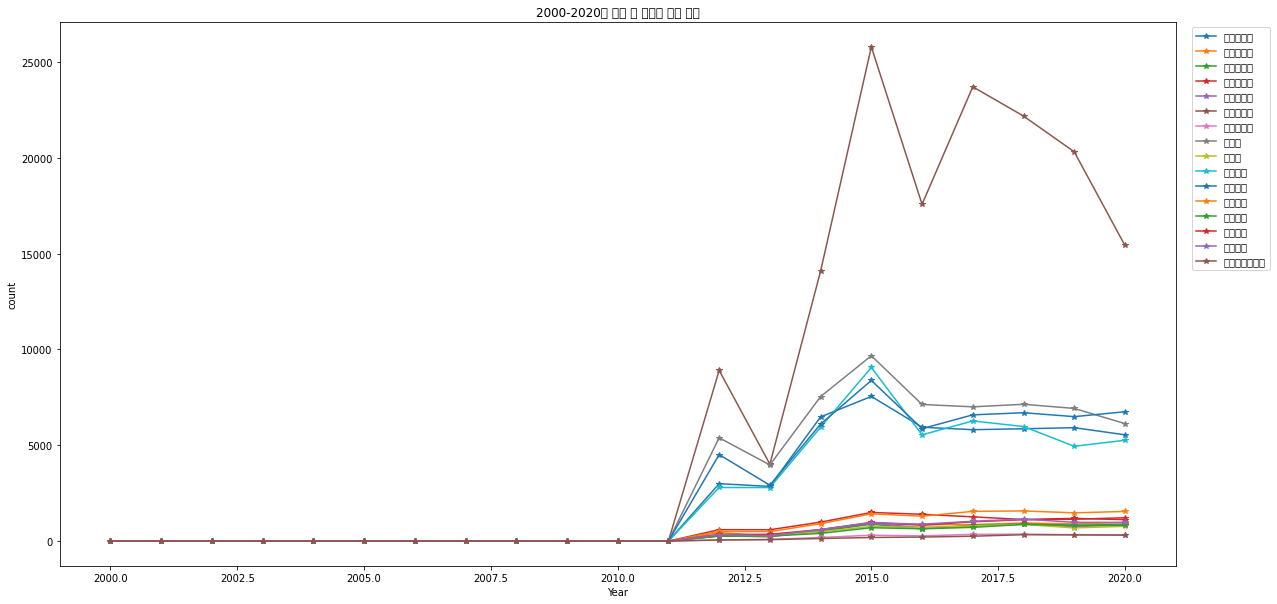

In [ ]:
sj = Cleaning_data(ingu,"세종특별자치시")
Migration_chart(sj,"세종")

대전, 경기도, 충북, 충남, 서울에서 전입

#### 데이터 2021년 부터 존재하는 이유
2010년 12월 27일에 공포된 '세종시 설치 등에 관한 특별법'에 따라 종전의 충청남도 연기군 전역과 공주시(의당면·장기면·반포면)의 일부 그리고 충청북도 청원군(부용면)의 일부를 흡수하여 2012년 7월 1일에 17번째 광역자치단체로 공식 출범하였다.

### 순인구이동 분석

In [ ]:
#df_move = pd.read_csv(r'.\data\공공데이터수집\시군구별_순이동자수.csv', encoding = 'euc-kr') #Land Price Variation Rate
df_move = pd.read_csv(path+'이주/'+'시군구별_순이동자수.csv', encoding = 'euc-kr') #Land Price Variation Rate
df_move.drop([0,1],inplace=True)
df_move.set_index('행정구역(시군구)별',inplace=True)
df_move = df_move.transpose()

df_move.index = pd.to_datetime(df_move.index, format="%Y. %m")
df_move.replace("-",np.nan,inplace=True)
df_move.fillna(0,inplace=True)
df_move = df_move.astype(int)
df_move.columns.name = None

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.line(df_move, x=df_move.index, y=df_move.columns)
fig.write_html("순이동 추세그래프.html")
fig

ValueError: ignored

경기도, 서울의 순이동인구수 변화가 가장 크다 
- 경기도는 유입, 서울은 유출의 추세
그 뒤로 눈에 띄는 지역은 부산, 대구 , 세종시 정도 (인천도) 

https://blog.naver.com/cathx618/222247088281

눈에 띄는 지역의 전입과 전출 데이터를 살펴보자!  

In [ ]:
#net_mig = pd.read_csv(r'.\data\공공데이터수집\지역별 순인구이동.csv', encoding = 'euc-kr') #Land Price Variation Rate
net_mig = pd.read_csv(path+'이주/'+'지역별 순인구이동.csv', encoding = 'euc-kr') #Land Price Variation Rate

In [ ]:
net_mig.head()

전출지별   전입지별       2000  ...       2018       2019       2020
0  전출지별   전입지별  순이동자수 (명)  ...  순이동자수 (명)  순이동자수 (명)  순이동자수 (명)
1    전국     전국          0  ...          0          0          0
2    전국  서울특별시     -46939  ...    -110230     -49588     -64850
3    전국  부산광역시     -43694  ...     -26759     -23354     -14347
4    전국  대구광역시      -3352  ...     -14242     -23673     -16835

[5 rows x 23 columns]

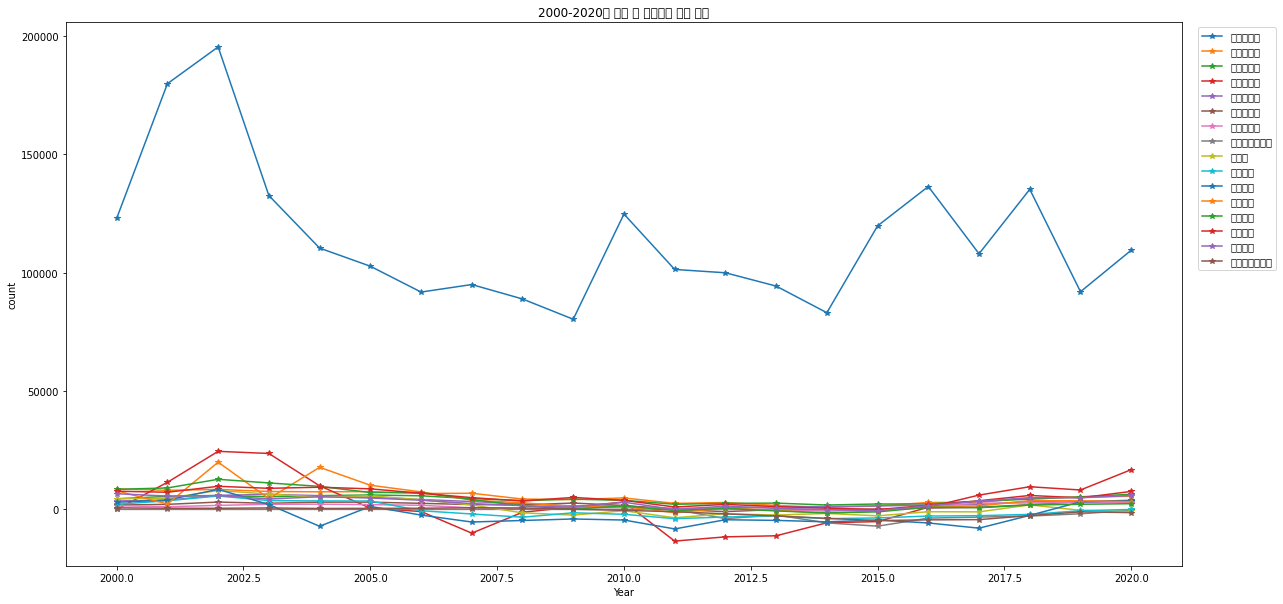

In [ ]:
net_mig_gg = Cleaning_data(net_mig,"경기도")
Migration_chart(net_mig_gg,"경기도")

경기도의 경우 서울 전입자가 압도적

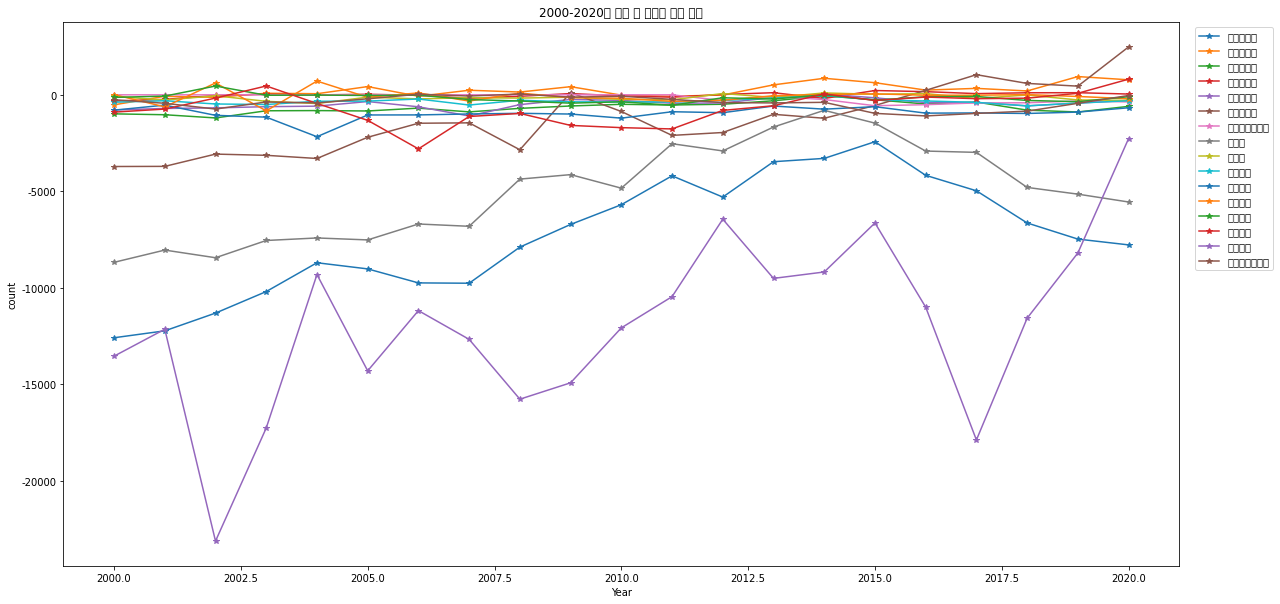

In [ ]:
net_mig_busan = Cleaning_data(net_mig,"부산광역시")
Migration_chart(net_mig_busan,"부산")

부산의 경우 경남, 서울, 제주도, 경기도 순으로 전출자가 훨씬 많은 것을 확인할 수 있다.

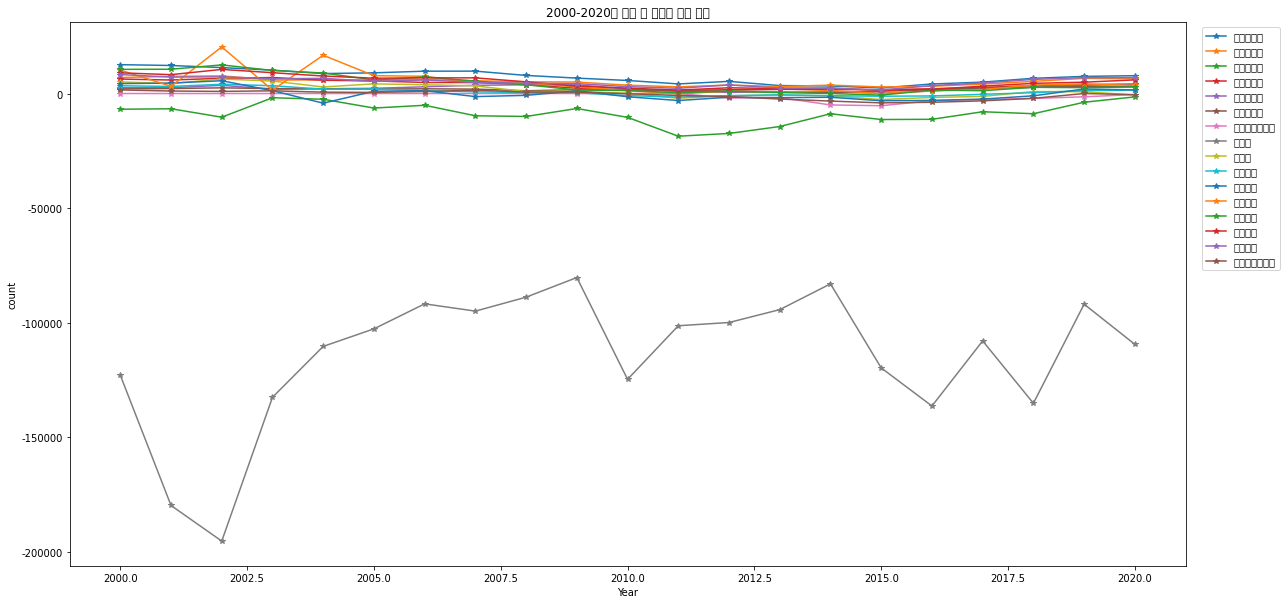

In [ ]:
net_mig_seoul = Cleaning_data(net_mig,"서울특별시")
Migration_chart(net_mig_seoul,"서울")

경기도, 인천으로 전출

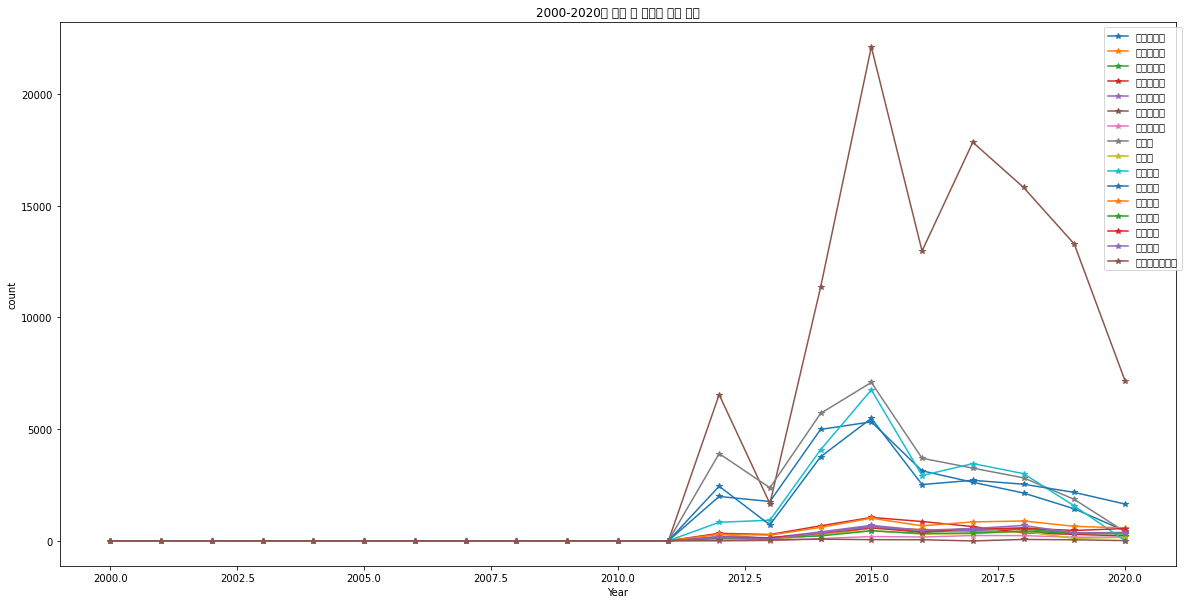

In [ ]:
net_mig_sj = Cleaning_data(net_mig,"세종특별자치시")
Migration_chart(net_mig_sj,"세종")

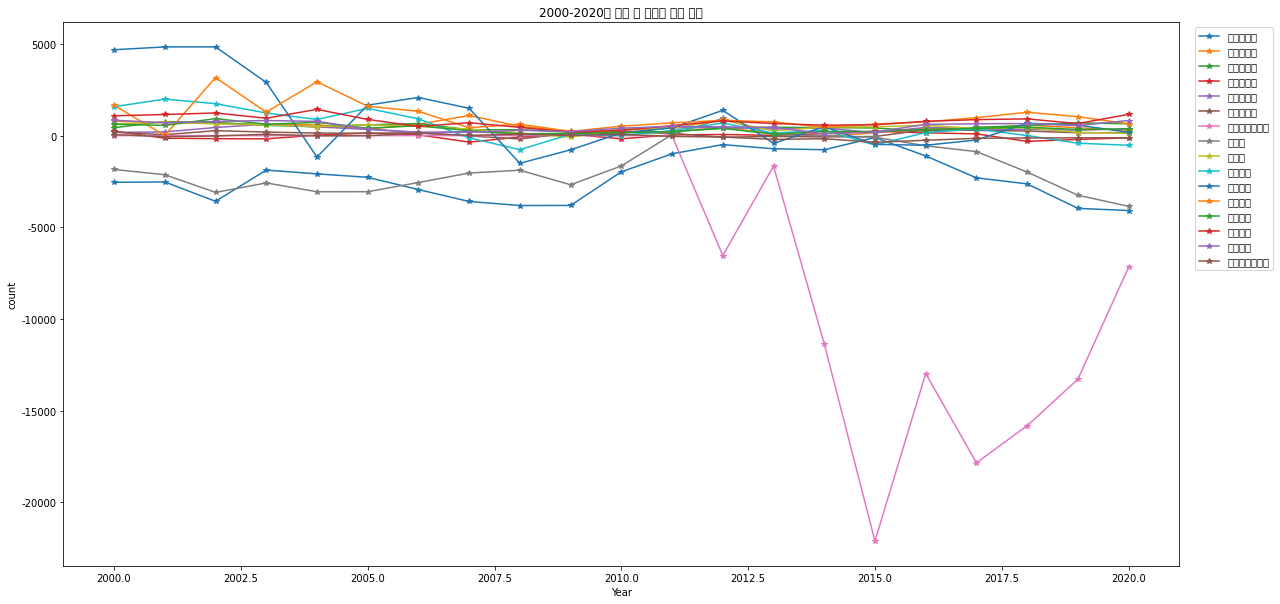

In [ ]:
net_mig_dj = Cleaning_data(net_mig,"대전광역시")
Migration_chart(net_mig_dj,"대전")

### 연간 지역별 전출자 수 변화  

In [ ]:
#지역별 전출 데이터에 대한 전처리함수 
def Move_out_data(df,region): #스트링으로 입력
    move_to = df[df['전출지별'] == region]
    
    a = move_to[(move_to['전입지별']== region) | (move_to['전입지별']=="전국")].index
    a.to_list()
    move_to.drop([x for x in a],axis=0,inplace=True) 
    
    move_to.drop(["전출지별"],axis=1,inplace=True)
    move_to.set_index(["전입지별"],inplace=True)

    move_to = move_to.transpose()
    
    #move_to.reset_index(inplace=True)
    #move_to = move_to.rename(columns = {'index': 'year'})
    #move_to.set_index(["year"], inplace=True)
    move_to.index = pd.to_datetime(move_to.index).year
    
    move_to.replace("-",np.nan,inplace=True)
    move_to.fillna(0,inplace=True)
    move_to.columns.name = None
    
    return move_to.astype(int)

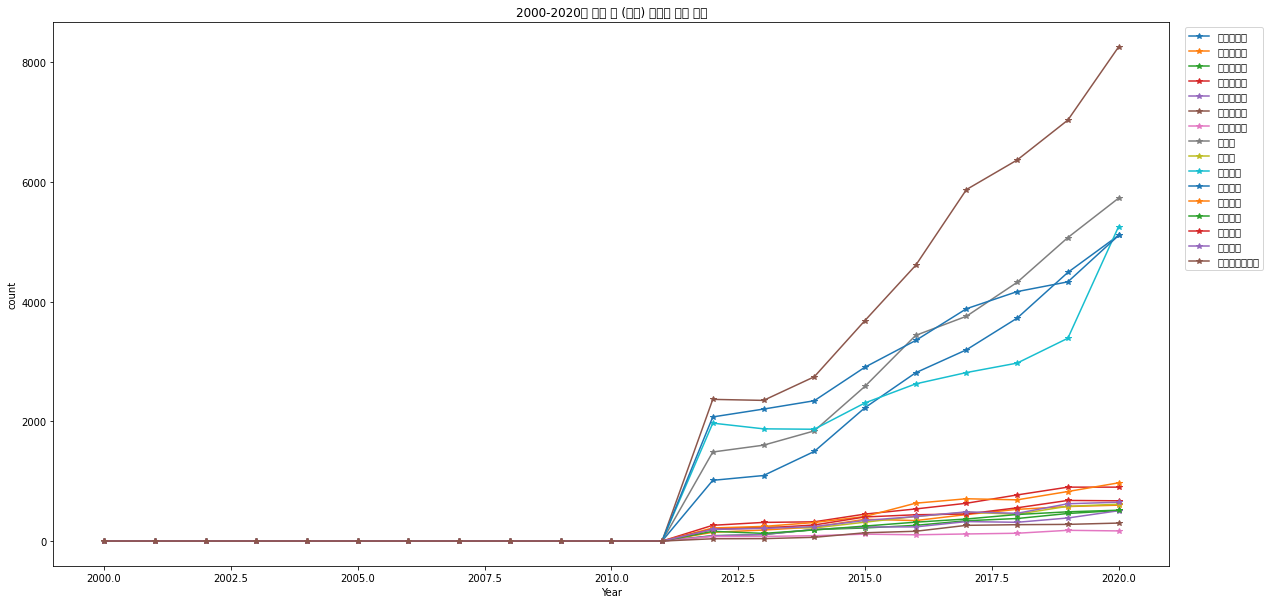

In [ ]:
move_out_sj = Move_out_data(ingu,"세종특별자치시")
Migration_chart(move_out_sj,"(전출) 세종")

2015년 이후로 급격하게 전출 인구가 증가하는 추세를 보인다  

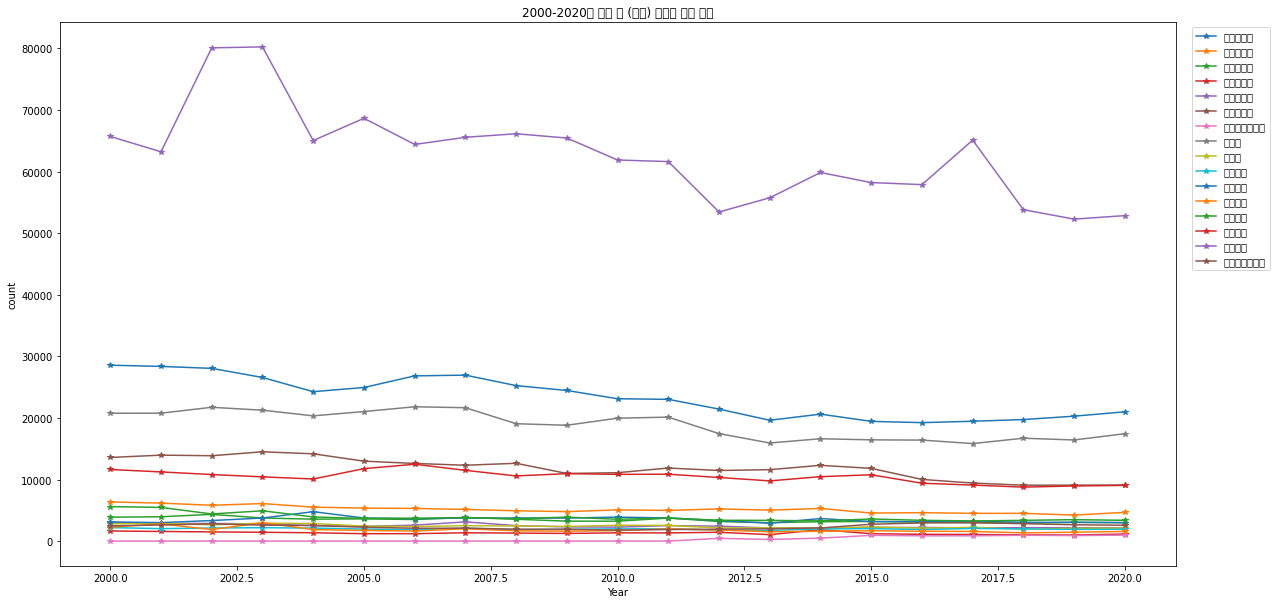

In [ ]:
move_out_bs = Move_out_data(ingu,"부산광역시")
Migration_chart(move_out_bs,"(전출) 부산")

양산신도시 개발, 귀농인구가 늘어남으로 경남행 전출인구가 증가한 것으로 보임   
그러나 2018년이후 다시 부산으로 전입하는 추세  
http://www.kookje.co.kr/news2011/asp/newsbody.asp?code=0200&key=20210729.22013008225

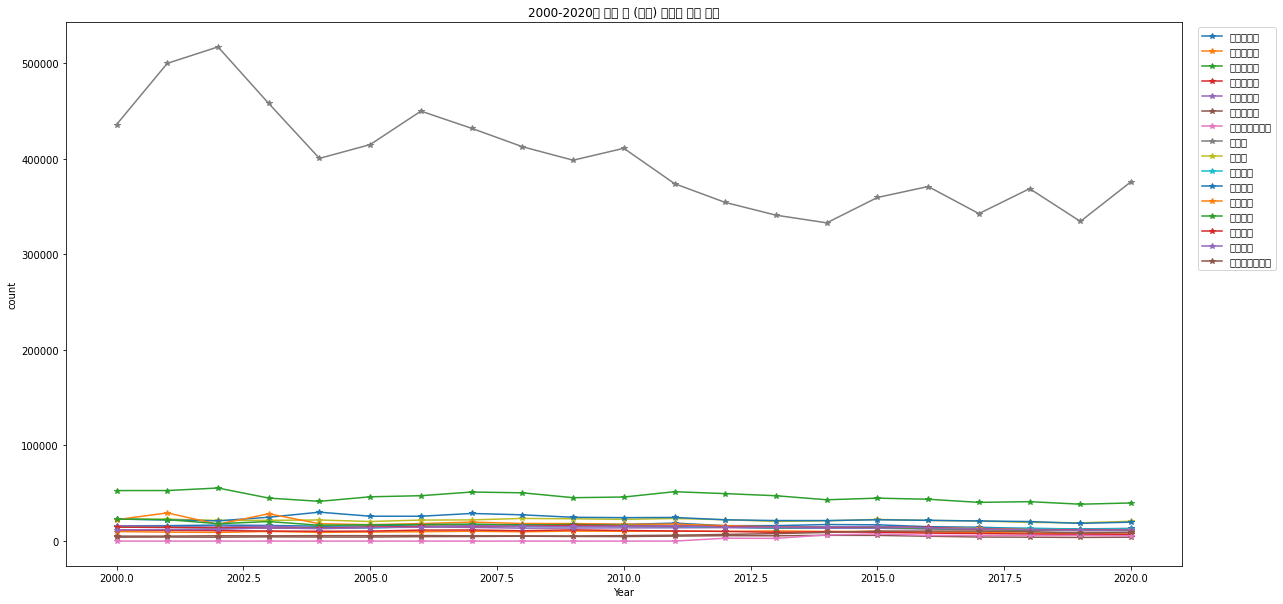

In [ ]:
move_out_sl = Move_out_data(ingu,"서울특별시")
Migration_chart(move_out_sl,"(전출) 서울")

http://www.newstomato.com/ReadNews.aspx?no=1050706&inflow=N

#### 전출인구가 많은 지역과 연령대, 주택 가격과의 연관성을 알아보자! 

### 2016~2020 연간 지역 별 전출사유 분석 

In [ ]:
import glob

#files = glob.glob("C:/Users/sanga/Desktop/4_week_project/data/공공데이터수집/전출데이터/*") 
files = glob.glob(path+'이주/'+'전출데이터/*') 

In [ ]:
files

['mount/MyDrive/estate/한국 부동산 데이터 시각화 경진대회_data/이주/전출데이터/2017년 연간 국내인구이동 보도자료 통계표.xlsx',
 'mount/MyDrive/estate/한국 부동산 데이터 시각화 경진대회_data/이주/전출데이터/2018년 연간 국내인구이동 보도자료 통계표.xlsx',
 'mount/MyDrive/estate/한국 부동산 데이터 시각화 경진대회_data/이주/전출데이터/2019년 연간 국내인구이동 보도자료 통계표.xlsx',
 'mount/MyDrive/estate/한국 부동산 데이터 시각화 경진대회_data/이주/전출데이터/2020년 연간 국내인구이동 보도자료 통계표.xlsx',
 'mount/MyDrive/estate/한국 부동산 데이터 시각화 경진대회_data/이주/전출데이터/2016년 연간 국내인구이동 보도자료 통계표.xlsx']

In [ ]:
#files[0][57:61]
files[0][55:59]

'2017'

In [ ]:
#전체 지역 별 전출 인구 비율 계산하는 함수
def Proportion(df): 
    for i in range(1,len(df.columns)):
        df[df.columns[i]] = df[df.columns[i]] / df[df.columns[i]].sum()*100
        
    return df

# 2016 == 0 ~ 2020 == 4
def Reason_Data_Cleansing(year):
    df = pd.DataFrame()
    #files = glob.glob("C:/Users/sanga/Desktop/4_week_project/data/공공데이터수집/전출데이터/*") 
    files = glob.glob(path+'이주/'+'전출데이터/*') 
    for i in range(len(files)):
        #if files[i][57:61] == str(year):
        if files[0][55:59] == str(year):
            df = pd.read_excel(files[i], sheet_name='10. 시도 및 전입사유별',header=2, index_col=1)
    
    df = df.iloc[32:39,]
    df.drop(df.columns[0],axis=1,inplace=True)
    df.drop(df.columns[-2],axis=1,inplace=True)
    for col in df.columns:
        if 'Unnamed' in col:
            del df[col]
            
    df.reset_index(inplace=True)
    df.rename(columns={'index':'reason'},inplace=True)
   
    df = Proportion(df)
    return df

In [ ]:
r2016 = Reason_Data_Cleansing(2016)
r2017 = Reason_Data_Cleansing(2017)
r2018 = Reason_Data_Cleansing(2018)
r2019 = Reason_Data_Cleansing(2019)
r2020 = Reason_Data_Cleansing(2020)

IndexError: ignored

In [ ]:
n_list = [r2016,r2017,r2018,r2019,r2020]
year = [2016,2017,2018,2019,2020]
for i in range(5):
    n_list[i]['year']=year[i]
    
df_reason = pd.concat(n_list,axis=0,ignore_index=False)

In [ ]:
df_reason = pd.pivot_table(df_reason,index=["year","reason"])

In [ ]:
df_reason = df_reason.round(1)
del df_reason['전국']

In [ ]:
df_reason

빈칸


In [ ]:
from IPython.display import IFrame
import chart_studio.plotly as py
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.io as pio

from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Bar, Bar3D, Grid, Line, Liquid, Page, Pie, Timeline, Tab, Map, Grid
from pyecharts import options as opts

import folium, webbrowser, IPython, warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: ignored

index - year  
지역이름 두글자로 정리


In [ ]:
# 행정구역당 연도별 전출사유
df_reason_region=Timeline(
    init_opts=opts.InitOpts(
        theme=ThemeType.WESTEROS, 
        height='600px',
        width='800px')
).add_schema(is_auto_play=True)

for t in df_reason.index.get_level_values(0).unique().tolist():
    df=df_reason.loc[t]
    df = df.transpose()

    df_reason_region.add((Bar(
        init_opts=opts.InitOpts(
        theme=ThemeType.WESTEROS)
  ).add_xaxis(df.index.tolist())
  .add_yaxis('직업',df['직업'].to_list(),stack="stack1")
  .add_yaxis('가족',df['가족'].to_list(),stack="stack1")
  .add_yaxis('주택',df['주택'].to_list(),stack="stack1")
  .add_yaxis('교육',df['교육'].to_list(),stack="stack1")
  .add_yaxis('주거환경',df['주거환경'].to_list(),stack="stack1")
  .add_yaxis('자연환경',df['자연환경'].to_list(),stack="stack1")
  .add_yaxis('기타',df['기타'].to_list(),stack="stack1")
  .set_series_opts(label_opts=opts.LabelOpts(is_show=True,position='inside'))
  .set_global_opts(title_opts=opts.TitleOpts(title="연도에 따른 지역별 전출 사유 (%) ", subtitle="dacon 부동산대회 수상자팀 코드 참고"),
                     tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
                     legend_opts=opts.LegendOpts(type_ = 'scroll',
                                                 pos_left="65%", pos_bottom='79%', orient='verticle',legend_icon ='pin')))
  ,"{}년도".format(t))
    
df_reason_region.render('df_reason_region.html')

NameError: ignored

#### 2016~2020년 지역별 전출사유
- 직업,가족,주택의 이유로 전출
- 서울의 경우 주택이 31%로 가장 많은 비중 차지
- 세종,부산,인천 등 주택을 이유로 전출한 인구의 비중이 18~20%

### 연령대별 인구이동 분석
청년
- 청년층 정의  
청년에 대한 정의는 다양합니다. 대한민국 통계청은 만 15-29세까지의 남녀 모두를 청년으로 보고 있습니다. 대한민국 청소년법은 9-24세 남녀 모두로 대상을 정했습니다. 대한민국에서 정당은 19-45세의 당원을 청년당원으로 규정했습니다. 2013년 출범한 청년위원회는 20세-39세까지의 남녀 모두를 정책대상으로 정했습니다. 저희는 이번 분석에서 일반적으로 주거 주택 정책의 대상이 되는 만 20-39세를 청년층으로 설정했습니다. 

In [ ]:
  def Age_data(df,tit):
    df.drop([0],inplace=True)
    df.drop(df.columns[1],axis=1,inplace=True)
    df.rename(columns={'행정구역(시군구)별':'지역'},inplace=True)
    df[['2016','2017','2018','2019','2020']] = df[['2016','2017','2018','2019','2020']].astype(float)
    
    youth20 = df[df['연령별'] == "20 - 24세"]
    youth25 = df[df['연령별'] == "25 - 29세"]
    youth30 = df[df['연령별'] == "30 - 34세"] 
    youth35 = df[df['연령별'] == "35 - 39세"]
    y_list = [youth20,youth25,youth30,youth35]
    
    df_youth= pd.concat(y_list,axis=0,ignore_index=False)
    df_youth = pd.pivot_table(df_youth,index=['지역','연령별'])
    df_youth.columns.name = tit
    df_youth = df_youth.transpose()
    
    return df_youth
 
region_youth_mig = ['부산광역시', '서울특별시', '세종특별자치시']    

#### 지역별 청년층 순이동률

In [ ]:
#net_mig_age = pd.read_csv(r'.\data\공공데이터수집\시군구_연령순이동률.csv', encoding = 'euc-kr')
net_mig_age = pd.read_csv(path+'이주/'+'시군구_연령순이동률.csv', encoding = 'euc-kr')
net_mig_youth = Age_data(net_mig_age,'지역별 청년층 순이동 %')
net_mig_youth = net_mig_youth[region_youth_mig]
net_mig_youth

지역               부산광역시                    ...  세종특별자치시                  
연령별           20 - 24세 25 - 29세 30 - 34세  ... 25 - 29세 30 - 34세 35 - 39세
지역별 청년층 순이동 %                             ...                           
2016              -0.4     -2.3     -1.2  ...     19.6     19.8     16.3
2017              -0.4     -2.2     -1.8  ...     17.3     19.9     15.9
2018              -0.1     -3.0     -2.1  ...     17.2     16.7     12.3
2019               0.3     -2.9     -2.0  ...     12.2     13.5      8.8
2020               0.6     -2.3     -0.9  ...      8.2      6.9      4.3

[5 rows x 12 columns]

#### 지역별 청년층 전출율

In [ ]:
#move_out_age = pd.read_csv(r'.\data\공공데이터수집\시군구_연령전출률.csv', encoding = 'euc-kr')
move_out_age = pd.read_csv(path+'이주/'+'시군구_연령전출률.csv', encoding = 'euc-kr')
move_out_youth = Age_data(move_out_age,'지역별 청년층 전출 %')
move_out_youth = move_out_youth[region_youth_mig]
move_out_youth

지역              부산광역시                    ...  세종특별자치시                  
연령별          20 - 24세 25 - 29세 30 - 34세  ... 25 - 29세 30 - 34세 35 - 39세
지역별 청년층 전출 %                             ...                           
2016              7.2     10.3      7.7  ...     20.7     13.8      9.5
2017              7.4     10.4      8.2  ...     20.9     14.3      9.7
2018              7.3     10.7      7.9  ...     19.5     13.8      9.3
2019              8.0     11.1      8.0  ...     21.4     14.2      9.7
2020              9.0     11.2      7.9  ...     22.3     14.9     11.1

[5 rows x 12 columns]

In [ ]:
move_out_youth[move_out_youth.columns].index.astype(str).tolist()

['2016', '2017', '2018', '2019', '2020']

In [ ]:
move_out_youth.columns[4]

('서울특별시', '20 - 24세')

In [ ]:
move_out_youth[move_out_youth.columns[4]].tolist()

[7.3, 7.0, 7.3, 7.5, 8.6]

(위에 값들은 시각화 해야할것들)

In [ ]:
# 시간에 따른 지역(4개지역)별 순이동,전출률의 변화 

#순이동
year = ['2016','2017','2018','2019','2020']

#서울
Seoul_net = (Line(
        init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
       .add_xaxis(net_mig_youth[net_mig_youth.columns].index.astype(str).tolist())
       .add_yaxis('20 - 24세',net_mig_youth[net_mig_youth.columns[4]].tolist())
       .add_yaxis('25 - 29세',net_mig_youth[net_mig_youth.columns[5]].tolist())
       .add_yaxis('30 - 34세',net_mig_youth[net_mig_youth.columns[6]].tolist())
       .add_yaxis('35 - 39세',net_mig_youth[net_mig_youth.columns[7]].tolist())
       ).set_global_opts(title_opts=opts.TitleOpts(title='순이동률 (%)', pos_bottom="90%"),
                        legend_opts=opts.LegendOpts(pos_bottom="90%",pos_right="10%",legend_icon='pin'),
                         tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),                
       ).set_series_opts(label_opts=opts.LabelOpts(is_show=False))


Seoul_mvout = (Line(
        init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
       .add_xaxis(move_out_youth[move_out_youth.columns].index.astype(str).tolist())
       .add_yaxis('20 - 24세',move_out_youth[move_out_youth.columns[4]].tolist())
       .add_yaxis('25 - 29세',move_out_youth[move_out_youth.columns[5]].tolist())
       .add_yaxis('30 - 34세',move_out_youth[move_out_youth.columns[6]].tolist())
       .add_yaxis('35 - 39세',move_out_youth[move_out_youth.columns[7]].tolist())
       ).set_global_opts(title_opts=opts.TitleOpts(title='전출률 (%)', pos_top="55%"),
                        legend_opts=opts.LegendOpts(pos_top="55%",pos_right="10%",legend_icon='pin'),
                         tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
       ).set_series_opts(label_opts=opts.LabelOpts(is_show=False))



#세종
Sejong_net = (Line(
        init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
       .add_xaxis(net_mig_youth[net_mig_youth.columns].index.astype(str).tolist())
       .add_yaxis('20 - 24세',net_mig_youth[net_mig_youth.columns[8]].tolist())
       .add_yaxis('25 - 29세',net_mig_youth[net_mig_youth.columns[9]].tolist())
       .add_yaxis('30 - 34세',net_mig_youth[net_mig_youth.columns[10]].tolist())
       .add_yaxis('35 - 39세',net_mig_youth[net_mig_youth.columns[11]].tolist())
       ).set_global_opts(title_opts=opts.TitleOpts(title='순이동률 (%)', pos_bottom="90%"),
                        legend_opts=opts.LegendOpts(pos_bottom="90%", pos_right="10%",legend_icon='pin'),
                         tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),   
       ).set_series_opts(label_opts=opts.LabelOpts(is_show=False))


Sejong_mvout = (Line(
        init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
       .add_xaxis(move_out_youth[move_out_youth.columns].index.astype(str).tolist())
       .add_yaxis('20 - 24세',move_out_youth[move_out_youth.columns[8]].tolist())
       .add_yaxis('25 - 29세',move_out_youth[move_out_youth.columns[9]].tolist())
       .add_yaxis('30 - 34세',move_out_youth[move_out_youth.columns[10]].tolist())
       .add_yaxis('35 - 39세',move_out_youth[move_out_youth.columns[11]].tolist())
       ).set_global_opts(title_opts=opts.TitleOpts(title='전출률 (%)', pos_top="55%"),
                        legend_opts=opts.LegendOpts(pos_top="55%",pos_right="10%",legend_icon='pin'),
                         tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
       ).set_series_opts(label_opts=opts.LabelOpts(is_show=False))


#부산
Busan_net = (Line(
        init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
       .add_xaxis(net_mig_youth[net_mig_youth.columns].index.astype(str).tolist())
       .add_yaxis('20 - 24세',net_mig_youth[net_mig_youth.columns[0]].tolist())
       .add_yaxis('25 - 29세',net_mig_youth[net_mig_youth.columns[1]].tolist())
       .add_yaxis('30 - 34세',net_mig_youth[net_mig_youth.columns[2]].tolist())
       .add_yaxis('35 - 39세',net_mig_youth[net_mig_youth.columns[3]].tolist())
       ).set_global_opts(title_opts=opts.TitleOpts(title='순이동률 (%)', pos_bottom="90%"),
                        legend_opts=opts.LegendOpts(pos_bottom="90%",pos_right="10%",legend_icon='pin'),
                         tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),            
       ).set_series_opts(label_opts=opts.LabelOpts(is_show=False))


Busan_mvout = (Line(
        init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
       .add_xaxis(move_out_youth[move_out_youth.columns].index.astype(str).tolist())
       .add_yaxis('20 - 24세',move_out_youth[move_out_youth.columns[0]].tolist())
       .add_yaxis('25 - 29세',move_out_youth[move_out_youth.columns[1]].tolist())
       .add_yaxis('30 - 34세',move_out_youth[move_out_youth.columns[2]].tolist())
       .add_yaxis('35 - 39세',move_out_youth[move_out_youth.columns[3]].tolist())
       ).set_global_opts(title_opts=opts.TitleOpts(title='전출률 (%)', pos_top="55%"),
                        legend_opts=opts.LegendOpts(pos_top="55%",pos_right="10%",legend_icon='pin'),
                         tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
       ).set_series_opts(label_opts=opts.LabelOpts(is_show=False))



#그래프 모으기

tab_youth_region=Tab()

grid_seoul=(Grid(
    init_opts=opts.InitOpts(theme=ThemeType.WESTEROS,width="1000px", height="600px")
    )
    .add(Seoul_net, grid_opts=opts.GridOpts(pos_bottom="80%",pos_top="40%"))
    .add(Seoul_mvout, grid_opts=opts.GridOpts(pos_bottom="10%",pos_top="65%"))
)

grid_sejong=(Grid(
    init_opts=opts.InitOpts(theme=ThemeType.WESTEROS,width="1000px", height="600px")
    )
    .add(Sejong_net, grid_opts=opts.GridOpts(pos_bottom="80%",pos_top="40%"))
    .add(Sejong_mvout, grid_opts=opts.GridOpts(pos_bottom="10%",pos_top="65%"))
)

grid_busan=(Grid(
    init_opts=opts.InitOpts(theme=ThemeType.WESTEROS,width="1000px", height="600px")
    )
    .add(Busan_net , grid_opts=opts.GridOpts(pos_bottom="80%",pos_top="40%"))
    .add(Busan_mvout, grid_opts=opts.GridOpts(pos_bottom="10%",pos_top="65%"))
)

tab_youth_region.add(grid_seoul,'서울특별시')
tab_youth_region.add(grid_sejong,'세종특별자치시')
tab_youth_region.add(grid_busan,'부산광역시')

tab_youth_region.render('tab_youth_region.html')

NameError: ignored

#### 연령대별 서울,세종,부산의 인구 변동 

서울의 경우 20대는 전입, 30대는 전출인구가 늘어나는 추세를 보이고있다.  
그러나 전출률은 2018년부터 증가하고있는 추세   
20대의 전출이 증가하고있다  


세종시의 경우 전출인구가 늘어나면서 순이동률이 점점 감소하는 추세이다 .

부산은 꾸준히 전출자가 발생하고 있다. 20대의 인구유출이 심화되고있다.

이유?
- 직업, 가족, 주택이 Top3
- 직업 가족은 왜?

[ “서울의 집값과 전셋값이 급등하면서 수도권 지역으로 이동하는 주택 수요가 늘면서 집값과 전셋값 모두 상승하고 있다”](https://newsis.com/view/?id=NISX20210127_0001320289)  
[관련기사](https://www.donga.com/news/Economy/article/all/20210130/105191018/1)

### 청년 취업률과의 연관성 ? 
- 취업희망지 , 희망업종? 사유 등등 추가조사필요

- http://www.moel.go.kr/news/enews/report/enewsView.do?news_seq=11069

생애주기(고등학교-대학교-취업)에 따라 청년층의 지역 간 이동 현상을 분석한 결과, 수도권 고등학생(793명)의 70.6%(560명)는 수도권을 이탈하지 않고 수도권에서 대학 진학 및 일자리 진입이 이루어졌다.
또한, 21.4%(170명)는 비수도권 대학으로 이동하였지만, 다시 수도권으로 일자리 진입이 이루어져, 수도권 고등학생의 90% 이상은 최종적으로 수도권 일자리에 진입하였다.
반면 수도권 소재 대학으로 진학은 하였지만, 일자리는 비수도권으로 이동한 경우가 2%(16명)이었고, 대학 소재지부터 현재 일자리 모두 비수도권으로 이탈한 경우는 2.3%(18명)에 그쳤다.

비수도권 출신 응답자(898명)의 경우, 대학부터 현재 일자리 지역까지 모두 비수도권인 경우가 75.4%(677명)로 가장 높았다.
반면, 비수도권 소재지의 대학을 진학한 이후 수도권 지역 일자리로 진입한 응답자가 8.8% 차지하고, 대학부터 현재 일자리까지 모두 수도권으로 이동한 경우는 4.6%를 차지하였다.

비수도권 출신 응답자(898명)의 생애주기별 수도권 이동 비율을 보면(<표 4>), 수도권에 있는 대학으로의 이동 비율은 8.6%(77명), 첫 일자리는 16.5%(148명), 현재 일자리는 18.6%(167명)로 비수도권 출신자들의 수도권 이동이 학교보다는 일자리로 인한 이동이 더 많은 것으로 나타났다.

황광훈 한국고용정보원 책임연구원은 “비수도권 출신 청년층의 일부가 수도권으로 이동하는 현상은 부모(가구주)의 이동, 대학 진학, 노동시장 진입 및 이동 등 복합적인 요인들이 작용한 것으로 보인다.”고 밝혔다.

https://blog.naver.com/builmoon/222288462939

### 주거 주택 정책의 대상이 되는 만 20-39세 - 청년층
- 주거정책 
policy_정규영 노트북파일 참고
- 매매/전세가 변동 
김혜환 노트북파일 참ㄱ

### 시군구 청년층 인구 

In [ ]:
import folium, webbrowser, IPython, warnings
warnings.filterwarnings('ignore')

In [ ]:
def folium_youth_count(year):
    #youth_kr = pd.read_csv(r'.\data\공공데이터수집\시군구_청년층_인구수.csv', encoding = 'euc-kr')
    youth_kr = pd.read_csv(path+'이주/'+'시군구_청년층_인구수.csv', encoding = 'euc-kr')
    youth_kr = youth_kr[youth_kr['C 연령별']=='청년층']
    youth_kr = youth_kr.drop(youth_kr.columns[1],axis=1)

    youth_year = youth_kr[['Name',str(year)]]
    youth_year  = youth_year.reset_index()
    youth_year  = youth_year.drop(youth_year.columns[0],axis=1)
    youth_year[str(year)] = youth_year[str(year)].astype(float)
    youth_year.sort_values(by=youth_year.columns[1],ascending=False)
    
    #state_geo = open('.\data\공공데이터수집\CTPRVN_WGS84.json', encoding = 'UTF-8').read()
    state_geo = open(path+'이주/'+'CTPRVN_WGS84.json', encoding = 'UTF-8').read()
    m = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=6)
    m.choropleth(geo_data=state_geo, name='choropleth',data=youth_year,
     columns=['Name',str(year)], key_on='feature.properties.CTP_KOR_NM',
     fill_color='RdPu',fill_opacity=0.8,line_opacity=0.5, legend_name='Population of Youth'
    )
    folium.LayerControl().add_to(m)


    m.save('folium_kr'+str(year)+'.html')
    #webbrowser.open_new("folium_kr2015.html")
    
    return m
    

In [ ]:
folium_youth_count(2015)

In [ ]:
folium_youth_count(2017)

In [ ]:
folium_youth_count(2018)

In [ ]:
folium_youth_count(2020)

2015년-2020년의 청년 인구의 수도권 집중 과열 현상  
2017년~2018년 사이 청년인구가 서울에서 경기도로 많이 빠져나갔음을 확인할 수 있음

### 전세가 매매가
2000년 1월의 집값을 100이라고 할때 그 상대값을 나타내는 그래프

지가가 어떻게 변화했냐에 따라서 그 자리에 아파트를 짓게 됨.  
아파트 매매가/전세가도 함께 살펴보도록 하자

### 매매가 전세가 데이터정리

In [ ]:
# 매매가격지수 df_kb1 : 2000년 1월 기준으로 바꾸기

constant=100/house_price.transpose()['2000-01-01'].values
df_kb1_2000=round(house_price.transpose().mul(constant,axis = 0),3)
df_kb1_2000=df_kb1_2000.transpose()
df_kb1_2000 = df_kb1_2000.iloc[168:]
df_kb1_2000 = df_kb1_2000.drop(df_kb1_2000.columns[-2:],axis=1)
df_kb1_2000 = df_kb1_2000.rename(columns={'총지수[2019.01=100]':'총지수[2000.01=100]','단독주택[2019.01=100]':'단독주택[2000.01=100]',
                                        '연립주택[2019.01=100]':'연립주택[2000.01=100]','아파트[2019.01=100]':'아파트[2000.01=100]'})
print('2000년 1월=100기준 매매가격지수')

# 전세가격지수 df_kb2 : 1986년 1월 기준으로 바꾸기
constant=100/lease_price.transpose()['2000-01-01'].values
df_kb2_2000=round(lease_price.transpose().mul(constant,axis = 0),3)
df_kb2_2000=df_kb2_2000.transpose()
df_kb2_2000 = df_kb2_2000.iloc[168:]
df_kb2_2000 = df_kb2_2000.drop(df_kb2_2000.columns[-2:],axis=1)
df_kb2_2000 = df_kb2_2000.rename(columns={'총지수[2019.01=100]':'총지수[2000.01=100]','단독주택[2019.01=100]':'단독주택[2000.01=100]',
                                        '연립주택[2019.01=100]':'연립주택[2000.01=100]','아파트[2019.01=100]':'아파트[2000.01=100]'})
print('2000년 1월=100기준 전세가격지수\n')

NameError: ignored

전국기준으로 살펴보기

In [ ]:
cate = ['2000년 기준 주택매매지수','2000년 기준 주택전세지수']
tab_kb1_kb2_2000 = Tab()

# 주택 매매 가격
attr = df_kb1_2000.index.astype(str).tolist()
line_kb1_2000 = Line(init_opts=opts.InitOpts( theme=ThemeType.WESTEROS,
                animation_opts=opts.AnimationOpts(
                    animation_delay=1000, animation_easing="elasticOut"
                )))
line_kb1_2000.add_xaxis(attr).set_global_opts(title_opts=opts.TitleOpts(title="2000년 기준 : 주택매매지수",subtitle="Dacon 수상자 코드 참고"),
                         yaxis_opts=opts.AxisOpts(min_='Datamin', name = "매매 가격",name_location="center",type_="value",is_scale=True),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=0)),
                 datazoom_opts=opts.DataZoomOpts(type_="inside"),
                 legend_opts=opts.LegendOpts(pos_left="40%",legend_icon='pin'),
                                tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
                          ).set_series_opts(label_opts=opts.LabelOpts(is_show=False))

for col in df_kb1_2000.columns:
    line_kb1_2000.overlap(Line(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS)).add_xaxis(attr).add_yaxis(col,df_kb1_2000[col]))
tab_kb1_kb2_2000.add(line_kb1_2000, cate[0])

# 주택 전세 가격
attr = df_kb2_2000.index.astype(str).tolist()
line_kb2_2000 = Line(init_opts=opts.InitOpts( theme=ThemeType.WESTEROS,
                animation_opts=opts.AnimationOpts(
                    animation_delay=1000, animation_easing="elasticOut"
                )))
line_kb2_2000.add_xaxis(attr).set_global_opts(title_opts=opts.TitleOpts(title="2000년 기준 : 주택전세지수",subtitle="Dacon 수상자 코드 참고"),
                         yaxis_opts=opts.AxisOpts(min_='Datamin', name = "전세 가격",name_location="center",type_="value",is_scale=True),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=0)),
                 datazoom_opts=opts.DataZoomOpts(type_="inside"),
                 legend_opts=opts.LegendOpts(pos_left="40%",legend_icon='pin'),
                                tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
                          ).set_series_opts(label_opts=opts.LabelOpts(is_show=False))
for col in df_kb2_2000.columns:
    line_kb2_2000.overlap(Line(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS)).add_xaxis(attr).add_yaxis(col,df_kb2_2000[col]))

tab_kb1_kb2_2000.add(line_kb2_2000, cate[1])
tab_kb1_kb2_2000.render('house_price_2000.html')

NameError: ignored

### 지가변동률

In [ ]:
# 2010년 기준 
land_price_2005 = land_price[['전국[%]','서울[%]']]
regionset_2005 = np.ones(shape=land_price_2005.values.shape)

# 변동률 도출 공식
for i, j in enumerate(land_price_2005.values):
    if i == 0:
        continue
    regionset_2005[i] = regionset_2005[i-1]*(1+j/100)

regionset_2005_df = pd.DataFrame(regionset_2005)
regionset_2005_df.index = land_price_2005.index
regionset_2005_df.columns = ['전국','서울']
regionset_2005_df = regionset_2005_df.round(3)

NameError: ignored

In [ ]:
# 서울과 타 지역간 지가변동률 비교
land_price_region = land_price[['서울[%]','세종[%]','인천[%]','부산[%]']]
land_price_region = land_price.round(2)

index =land_price_region.index.astype(str).tolist()

diff_fig= (Line(
        init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
       .add_xaxis(index)
       .add_yaxis('서울', land_price_region['서울[%]'].tolist())
       .add_yaxis('세종', land_price_region['세종[%]'].tolist())
       .add_yaxis('인천', land_price_region['인천[%]'].tolist())
       .add_yaxis('부산', land_price_region['부산[%]'].tolist()))

diff_fig.add_xaxis(index).set_global_opts(title_opts=opts.TitleOpts(title="서울과 타 지역간 지가변동률 비교",subtitle = "Dacon 수상자 코드 참고"),
                         yaxis_opts=opts.AxisOpts(min_='Datamin', name = "지가변동률",name_location="center",type_="value",is_scale=True),
                         xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=0)),
                                tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
                        datazoom_opts = opts.DataZoomOpts(type_="inside"),
                                          
                 
                 legend_opts=opts.LegendOpts(pos_top='3%',legend_icon='pin')
                          ).set_series_opts(label_opts=opts.LabelOpts(is_show=False))      


In [ ]:
# 2005년 기준 지가변동률 시각화
index = regionset_2005_df.index.astype(str).tolist()

fig_2005 = (Line(
        init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
       .add_xaxis(index)
       .add_yaxis('전국', regionset_2005_df['전국'].tolist())
       .add_yaxis('서울', regionset_2005_df['서울'].tolist())
       ).set_global_opts(title_opts=opts.TitleOpts(title="2005년 기준 서울 지가변동률", subtitle = "스크롤을 줄여 원하는 시간대를 잡아보세요!",pos_top="50%"),
                         yaxis_opts = opts.AxisOpts(min_='dataMin'),
                                tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
                        legend_opts=opts.LegendOpts(pos_top='53%',legend_icon='pin')
       ).set_series_opts(label_opts=opts.LabelOpts(is_show=False))


#데이터 합치기 
fig_ddang = (Grid(init_opts=opts.InitOpts(width="800px", height="600px",theme=ThemeType.WESTEROS))
                    .add(diff_fig, grid_opts=opts.GridOpts(pos_bottom="58%"))
                    .add(fig_2005, grid_opts=opts.GridOpts(pos_top="60%")))

fig_ddang.render('land_price.html')

### 청년층 주거형태 (일반가구)

In [ ]:
y_kind = pd.read_csv(r'.\data\공공데이터수집\청년층_주거형태.csv', encoding = 'euc-kr')
#y_kind = y_kind[y_kind['가구주의 연령']=='청년층'] 

In [ ]:
len(y_kind)

In [ ]:
y_kind

### html파일 어떻게 실행해서 피피티로 불러올것인지? 

빈칸

@

@

@


# **IV. 연도별 부동산 가격 변화**

In [ ]:
#pd.read_csv('desktop\한국은행 기준금리.csv', encoding = 'CP949', index_col = 0)
pd.read_csv(path+'한국은행 기준금리.csv', encoding = 'CP949', index_col = 0)

In [ ]:
#df = pd.read_excel('desktop\연간 매매지수-지수(아파트).xlsx')
df = pd.read_excel(path+'연간 매매지수-지수(아파트).xlsx')

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df.set_index('도시')

In [ ]:
df = df.transpose()

In [ ]:
df.rename(columns = df.iloc[0], inplace = True)
df = df.drop(df.index[0])
df

In [ ]:
#df2 = pd.read_excel('desktop\연간 매매지수-변동률(아파트).xlsx')
df2 = pd.read_excel(path+'연간 매매지수-변동률(아파트).xlsx')

In [ ]:
df2.set_index('도시')

In [ ]:
df2 = df2.transpose()
df2

In [ ]:
df2.rename(columns = df2.iloc[0], inplace = True)
df2 = df2.drop(df2.index[0])
df2

In [ ]:
#df3 = pd.read_excel('desktop\연간 매매지수-지수(연립다세대).xlsx')
df3 = pd.read_excel(path+'연간 매매지수-지수(연립다세대).xlsx')

In [ ]:
df3.set_index('도시')

In [ ]:
df3 = df3.transpose()
df3

In [ ]:
df3.rename(columns = df3.iloc[0], inplace = True)
df3 = df3.drop(df3.index[0])
df3

In [ ]:
#df4 = pd.read_excel('desktop\연간 매매지수-변동률(연립다세대).xlsx')
df4 = pd.read_excel(path+'연간 매매지수-변동률(연립다세대).xlsx')

In [ ]:
df4.set_index('도시')

In [ ]:
df4 = df4.transpose()
df4

In [ ]:
df4.rename(columns = df4.iloc[0], inplace = True)
df4 = df4.drop(df4.index[0])
df4

In [ ]:
#df5 = pd.read_excel('desktop\연간 전세지수-지수(아파트).xlsx')
df5 = pd.read_excel(path+'연간 전세지수-지수(아파트).xlsx')

In [ ]:
df5.set_index('도시')

In [ ]:
df5 = df5.transpose()
df5

In [ ]:
df5.rename(columns = df5.iloc[0], inplace = True)
df5 = df5.drop(df5.index[0])
df5

In [ ]:
df6 = pd.read_excel('desktop\연간 전세지수-변동률(아파트).xlsx')

In [ ]:
df6.set_index('도시')

In [ ]:
df6 = df6.transpose()
df6

In [ ]:
df6.rename(columns = df6.iloc[0], inplace = True)
df6 = df6.drop(df6.index[0])
df6

In [ ]:
#df7 = pd.read_excel('desktop\연간 전세지수-지수(연립다세대).xlsx')
df7 = pd.read_excel(path+'연간 전세지수-지수(연립다세대).xlsx')

In [ ]:
df7.set_index('도시')

In [ ]:
df7 = df7.transpose()
df7

In [ ]:
df7.rename(columns = df7.iloc[0], inplace = True)
df7 = df7.drop(df7.index[0])
df7

In [ ]:
df8 = pd.read_excel('desktop\연간 전세지수-변동률(연립다세대).xlsx')

In [ ]:
df8.set_index('도시')

In [ ]:
df8 = df8.transpose()
df8

In [ ]:
df8.rename(columns = df8.iloc[0], inplace = True)
df8 = df8.drop(df8.index[0])
df8

In [ ]:
#df9 = pd.read_excel('desktop\연간 월세지수-지수(아파트).xlsx')
df9 = pd.read_excel(path+'연간 월세지수-지수(아파트).xlsx')

In [ ]:
df9.set_index('도시')

In [ ]:
df9 = df9.transpose()
df9

In [ ]:
df9.rename(columns = df9.iloc[0], inplace = True)
df9 = df9.drop(df9.index[0])
df9

In [ ]:
#df10 = pd.read_excel('desktop\연간 월세지수-변동률(아파트).xlsx')
df10 = pd.read_excel(path+'연간 월세지수-변동률(아파트).xlsx')

In [ ]:
df10.set_index('도시')

In [ ]:
df10 = df10.transpose()
df10

In [ ]:
df10.rename(columns = df10.iloc[0], inplace = True)
df10 = df10.drop(df10.index[0])
df10

In [ ]:
#df11 = pd.read_excel('desktop\연간 월세지수-지수(연립다세대).xlsx')
df11 = pd.read_excel(path+연간 월세지수-지수(연립다세대).xlsx')

In [ ]:
df11.set_index('도시')

In [ ]:
df11 = df11.transpose()
df11

In [ ]:
df11.rename(columns = df11.iloc[0], inplace = True)
df11 = df11.drop(df11.index[0])
df11

In [ ]:
#df12 = pd.read_excel('desktop\연간 월세지수-변동률(연립다세대).xlsx')
df12 = pd.read_excel(path+'연간 월세지수-변동률(연립다세대).xlsx')

In [ ]:
df12.set_index('도시')

In [ ]:
df12 = df12.transpose()
df12

In [ ]:
df12.rename(columns = df12.iloc[0], inplace = True)
df12 = df12.drop(df12.index[0])
df12

In [ ]:
#df31 = pd.read_csv('desktop\건축연령별 매매지수(아파트) 17.11 = 100.csv', encoding = 'CP949', index_col = 0)
df31 = pd.read_csv(path+'건축연령별 매매지수(아파트) 17.11 = 100.csv', encoding = 'CP949', index_col = 0)
df31 = df31.transpose()
df31

In [ ]:
#df32 = pd.read_csv('desktop\건축연령별 매매지수(연립다세대) 17.11 = 100.csv', encoding = 'CP949', index_col = 0)
df32 = pd.read_csv(path+'건축연령별 매매지수(연립다세대) 17.11 = 100.csv', encoding = 'CP949', index_col = 0)
df32 = df32.transpose()
df32

In [ ]:
#df33 = pd.read_csv('desktop\건축연령별 전세지수(아파트) 17.11 = 100.csv', encoding = 'CP949', index_col = 0)
df33 = pd.read_csv(path+'건축연령별 전세지수(아파트) 17.11 = 100.csv', encoding = 'CP949', index_col = 0)
df33 = df33.transpose()
df33

In [ ]:
#df34 = pd.read_csv('desktop\건축연령별 전세지수(연립다세대) 17.11 = 100.csv', encoding = 'CP949', index_col = 0)
df34 = pd.read_csv(path+'건축연령별 전세지수(연립다세대) 17.11 = 100.csv', encoding = 'CP949', index_col = 0)
df34 = df34.transpose()
df34

In [ ]:
#df35 = pd.read_csv('desktop\건축연령별 월세지수(아파트) 17.11 = 100.csv', encoding = 'CP949', index_col = 0)
df35 = pd.read_csv(path+'건축연령별 월세지수(아파트) 17.11 = 100.csv', encoding = 'CP949', index_col = 0)
df35 = df35.transpose()
df35

In [ ]:
#df36 = pd.read_csv('desktop\건축연령별 월세지수(연립다세대) 17.11 = 100.csv', encoding = 'CP949', index_col = 0)
df36 = pd.read_csv(path+'건축연령별 월세지수(연립다세대) 17.11 = 100.csv', encoding = 'CP949', index_col = 0)
df36 = df36.transpose()
df36

In [ ]:
def sale_index_number_apt_chart(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('연간매매지수-지수(아파트)')
    plt.xlabel('Year')
    plt.ylabel('지수')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.show()
    
df.replace("-",np.nan,inplace=True)
df.fillna(0,inplace=True)
sale_index_number_apt_chart(df)

In [ ]:
def sale_fr_apt_chart(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('연간매매지수-변동률(아파트)')
    plt.xlabel('Year')
    plt.ylabel('변동률')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.show()
    
df2.replace("-",np.nan,inplace=True)
df2.fillna(0,inplace=True)
sale_fr_apt_chart(df2)

In [ ]:
def sale_index_number_rowhouse_chart(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('연간매매지수-지수(연립다세대)')
    plt.xlabel('Year')
    plt.ylabel('지수')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.show()
    
df3.replace("-",np.nan,inplace=True)
df3.fillna(0,inplace=True)
sale_index_number_rowhouse_chart(df3)

In [ ]:
def sale_fr_rowhouse_chart(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('연간매매지수-변동률(연립다세대)')
    plt.xlabel('Year')
    plt.ylabel('변동률')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.show()
    
df4.replace("-",np.nan,inplace=True)
df4.fillna(0,inplace=True)
sale_fr_rowhouse_chart(df4)

In [ ]:
def charter_index_number_apt_chart(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('연간전세지수-지수(아파트)')
    plt.xlabel('Year')
    plt.ylabel('지수')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.show()
    
df5.replace("-",np.nan,inplace=True)
df5.fillna(0,inplace=True)
charter_index_number_apt_chart(df5)

In [ ]:
def charter_fr_apt_chart(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('연간전세지수-변동률(아파트)')
    plt.xlabel('Year')
    plt.ylabel('변동률')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.show()
    
df6.replace("-",np.nan,inplace=True)
df6.fillna(0,inplace=True)
charter_fr_apt_chart(df6)

In [ ]:
def rd_index_number_rowhouse_chart(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('연간전세지수-지수(연립다세대)')
    plt.xlabel('Year')
    plt.ylabel('지수')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.show()
    
df7.replace("-",np.nan,inplace=True)
df7.fillna(0,inplace=True)
rd_index_number_rowhouse_chart(df7)

In [ ]:
def charter_fr_rowhouse_chart(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('연간전세지수-변동률(연립다세대)')
    plt.xlabel('Year')
    plt.ylabel('변동률')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.show()
    
df8.replace("-",np.nan,inplace=True)
df8.fillna(0,inplace=True)
charter_fr_rowhouse_chart(df8)

In [ ]:
def mr_index_number_apt_chart(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('연간월세지수-지수(아파트)')
    plt.xlabel('Year')
    plt.ylabel('지수')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.show()
    
df9.replace("-",np.nan,inplace=True)
df9.fillna(0,inplace=True)
mr_index_number_apt_chart(df9)

In [ ]:
def mr_fr_apt_chart(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('연간월세지수-변동률(아파트)')
    plt.xlabel('Year')
    plt.ylabel('변동률')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.show()
    
df10.replace("-",np.nan,inplace=True)
df10.fillna(0,inplace=True)
mr_fr_apt_chart(df10)

In [ ]:
def mr_index_number_rowhouse_chart(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('연간월세지수-지수(연립다세대)')
    plt.xlabel('Year')
    plt.ylabel('지수')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.show()
    
df11.replace("-",np.nan,inplace=True)
df11.fillna(0,inplace=True)
mr_index_number_rowhouse_chart(df11)

In [ ]:
df12.replace("-",np.nan,inplace=True)
df12.fillna(0,inplace=True)
df12

In [ ]:
df12.drop('-', axis = 'columns', inplace = True)

In [ ]:
def mr_fr_rowhouse_chart(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('연간월세지수-변동률(연립다세대)')
    plt.xlabel('Year')
    plt.ylabel('변동률')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.show()
    
mr_fr_rowhouse_chart(df12)

In [ ]:
def year_sale_index_number_apt_chart(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('건축연령별 매매지수(아파트)17.11 = 100.csv')
    plt.xlabel('Year')
    plt.ylabel('매매지수')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.show()
    
df31.replace("-",np.nan,inplace=True)
df31.fillna(0,inplace=True)
year_sale_index_number_apt_chart(df31)

In [ ]:
seoul_age = []
seoul_age = pd.DataFrame(df31)
for i in range(2016,2021,1):
    a= df31.loc[str(i)+'-01-01']

seoul_age[['서울연령1', '서울연령2', '서울연령3', '서울연령4', '서울연령5']]

fig = plt.figure(figsize = (20, 7))
sns.lineplot(data = seoul_age[['서울연령1', '서울연령2', '서울연령3', '서울연령4', '서울연령5']])
plt.show()

In [ ]:
fig = plt.figure(figsize = (20, 7))
sns.lineplot(data = mon_12[['서울연령1', '서울연령2', '서울연령3', '서울연령4', '서울연령5']])
plt.show()

In [ ]:
def year_sale_index_number_rowhouse_chart(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('건축연령별 매매지수(연립다세대)17.11 = 100.csv')
    plt.xlabel('Year')
    plt.ylabel('매매지수')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.show()
    
df32.replace("-",np.nan,inplace=True)
df32.fillna(0,inplace=True)
year_sale_index_number_apt_chart(df32)

In [ ]:
seoul_age = []
seoul_age = pd.DataFrame(df32)
for i in range(2016,2021,1):
    a= df32.loc[str(i)+'-01-01']

seoul_age[['서울연령1', '서울연령2', '서울연령3']]

fig = plt.figure(figsize = (20, 7))
sns.lineplot(data = seoul_age[['서울연령1', '서울연령2', '서울연령3']])
plt.show()

In [ ]:
def year_charter_fr_apt_chart(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('건축연령별 전세지수(아파트)17.11 = 100.csv')
    plt.xlabel('Year')
    plt.ylabel('전세지수')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.show()
    
df33.replace("-",np.nan,inplace=True)
df33.fillna(0,inplace=True)
year_sale_index_number_apt_chart(df33)

In [ ]:
seoul_age = []
seoul_age = pd.DataFrame(df31)
for i in range(2016,2021,1):
    a= df33.loc[str(i)+'-01-01']

seoul_age[['서울연령1', '서울연령2', '서울연령3', '서울연령4', '서울연령5']]

fig = plt.figure(figsize = (20, 7))
sns.lineplot(data = seoul_age[['서울연령1', '서울연령2', '서울연령3', '서울연령4', '서울연령5']])
plt.show()

In [ ]:
def year_charter_fr_rowhouse_chart(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('건축연령별 전세지수(연립다세대)17.11 = 100.csv')
    plt.xlabel('Year')
    plt.ylabel('전세지수')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.show()
    
df34.replace("-",np.nan,inplace=True)
df34.fillna(0,inplace=True)
year_charter_fr_rowhouse_chart(df34)

In [ ]:
seoul_age = []
seoul_age = pd.DataFrame(df32)
for i in range(2016,2021,1):
    a= df34.loc[str(i)+'-01-01']

seoul_age[['서울연령1', '서울연령2', '서울연령3']]

fig = plt.figure(figsize = (20, 7))
sns.lineplot(data = seoul_age[['서울연령1', '서울연령2', '서울연령3']])
plt.show()

In [ ]:
def year_mr_index_number_apt_chart(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('건축연령별 월세지수(아파트)17.11 = 100.csv')
    plt.xlabel('Year')
    plt.ylabel('월세지수')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.show()
    
df35.replace("-",np.nan,inplace=True)
df35.fillna(0,inplace=True)
year_mr_index_number_apt_chart(df35)

In [ ]:
seoul_age = []
seoul_age = pd.DataFrame(df31)
for i in range(2016,2021,1):
    a= df35.loc[str(i)+'-01-01']

seoul_age[['서울연령1', '서울연령2', '서울연령3', '서울연령4', '서울연령5']]

fig = plt.figure(figsize = (20, 7))
sns.lineplot(data = seoul_age[['서울연령1', '서울연령2', '서울연령3', '서울연령4', '서울연령5']])
plt.show()

In [ ]:
def year_mr_fr_rowhouse_chart(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df.index,df.values,'*-')

    plt.title('건축연령별 월세지수(연립다세대)17.11 = 100.csv')
    plt.xlabel('Year')
    plt.ylabel('월세지수')
    plt.ylim()

    plt.legend(df.columns.values, bbox_to_anchor=(1.01, 1))
    plt.show()
    
df36.replace("-",np.nan,inplace=True)
df36.fillna(0,inplace=True)
year_mr_fr_rowhouse_chart(df36)

In [ ]:
seoul_age = []
seoul_age = pd.DataFrame(df32)
for i in range(2016,2021,1):
    a= df36.loc[str(i)+'-01-01']

seoul_age[['서울연령1', '서울연령2', '서울연령3']]

fig = plt.figure(figsize = (20, 7))
sns.lineplot(data = seoul_age[['서울연령1', '서울연령2', '서울연령3']])
plt.show()